In [23]:
#Libraries
import georinex as gr
import os
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
import datetime
#import math
#import itertools
import Conv_dataframe as conv_dtframe #personal library

In [24]:
#Opening and reading Rinex file
#dir_work = r'C:\\Pesquisa\\IC_Daniel\\IC\Dados_Rinex'
dir_work = r'C:\\Users\danie\\Desktop\\IC\Dados_Rinex'
#name_file = 'ppte3121.20O' #not P1
#name_file = 'ufpr3121.20O' #not P1
#name_file = 'ppte0011.24O' #not P1
#name_file = 'sjsp0011.24o'  #R26
#name_file = 'ppte0021.24o' #not P1
#name_file = 'ppte0081.24o' #not P1
name_file = 'boav0011.24o' #...
#name_file = 'ppte0321.24o' #...8888
#name_file = 'ppte1231.24o' #...878888
#name_file = 'SJCU3420.23o'
path_file = os.path.join(Path(dir_work), name_file)

obs = gr.load(Path(path_file).expanduser(),useindicators=False,use=['G','R','E','C'])
data_interval = obs.interval

In [25]:
#Making a dataframe for GNSS signals   (Phase and code)
list_col = ['C1','C2','C5','P1','P2','L1','L2','L5']
df, list_col = conv_dtframe.get_dataframe_column(list_col,obs.to_dataframe())
df.reset_index(inplace=True)
df['Time_Sec'] = pd.to_timedelta(df['time'].dt.time.astype(str)).dt.total_seconds()
df.insert(1,'Time_Sec', df.pop('Time_Sec'))

In [26]:
#organizing list of satellites of Rinex file
list_sat = df['sv'].unique()
sv_GPS = [item for item in list_sat if item.startswith('G')]
sv_GALILEO = [item for item in list_sat if item.startswith('E')]
sv_GLONASS = [item for item in list_sat if item.startswith('R')]

list_phase = [item for item in list_col if item.startswith('L')]
list_code = [item for item in list_col if not item.startswith('L')]

In [27]:
#debug function*

#Verificar em qual satelite há valores em uma pseudodistancia especifica. *(Simples)

#GPS P1  (mudar os 'valores' para outras verificações)
#G - GPS
#E - GALILEO
#R - GLONASS

resultados = {}

# Loop para os satelites
for i in range(1, len(sv_GPS)+1):
    g_value = f'G{i:02d}'  # Formata o valor (mudar dependendo da constelaçao)
    
    #máscara para o valor atual de G
    mask = (df['sv'] == g_value)
    
    #há valores não NaN na coluna 'P1' com a máscara aplicada
    tem_valores = df[mask]['P1'].notna().any()
    
    #Armazena o resultado no dicionário
    resultados[g_value] = tem_valores

for g_value, tem_valores in resultados.items():
    print(f"Para {g_value}, valores não NaN: {tem_valores}")

Para G01, valores não NaN: False
Para G02, valores não NaN: False
Para G03, valores não NaN: False
Para G04, valores não NaN: False
Para G05, valores não NaN: False
Para G06, valores não NaN: False
Para G07, valores não NaN: False
Para G08, valores não NaN: False
Para G09, valores não NaN: False
Para G10, valores não NaN: False
Para G11, valores não NaN: False
Para G12, valores não NaN: False
Para G13, valores não NaN: False
Para G14, valores não NaN: False
Para G15, valores não NaN: False
Para G16, valores não NaN: False
Para G17, valores não NaN: False
Para G18, valores não NaN: False
Para G19, valores não NaN: False
Para G20, valores não NaN: False
Para G21, valores não NaN: False
Para G22, valores não NaN: False
Para G23, valores não NaN: False
Para G24, valores não NaN: False
Para G25, valores não NaN: False
Para G26, valores não NaN: False
Para G27, valores não NaN: False
Para G28, valores não NaN: False
Para G29, valores não NaN: False
Para G30, valores não NaN: False
Para G31, 

In [28]:
combinations_code = []

for code1 in list_code:
    for code2 in list_code:
        if code1 != code2:
            combination = f'{code2}_{code1}'
            if combination not in combinations_code and f'{code1}_{code2}' not in combinations_code and code2[1:2] >= code1[1:2]:
                combinations_code.append(combination)

combinations_code

['C2_C1',
 'C5_C1',
 'P1_C1',
 'P2_C1',
 'C5_C2',
 'P2_C2',
 'C2_P1',
 'C5_P1',
 'P2_P1',
 'C5_P2']

In [29]:
combinations_phase = []

for code1 in list_phase:
    for code2 in list_phase:
        if code1 != code2:
            combination = f'{code1}_{code2}'
            if combination not in combinations_phase and f'{code2}_{code1}' not in combinations_phase and code2[1:2] >= code1[1:2]:
                combinations_phase.append(combination)

combinations_phase

['L1_L2', 'L1_L5', 'L2_L5']

In [30]:
combinations_ALL = combinations_code + combinations_phase
combinations_ALL

['C2_C1',
 'C5_C1',
 'P1_C1',
 'P2_C1',
 'C5_C2',
 'P2_C2',
 'C2_P1',
 'C5_P1',
 'P2_P1',
 'C5_P2',
 'L1_L2',
 'L1_L5',
 'L2_L5']

In [31]:
#Adicionar cada elemento da lista como uma nova coluna no datafame
df[combinations_ALL] = np.nan

In [32]:
#creating list for smooth code
list_smooth_code= [item[0:1]+'S'+item[1:2] for item in list_code]
df[list_smooth_code] = np.nan

In [33]:
combinations_smooth_code = []

for code1 in list_smooth_code:
    for code2 in list_smooth_code:
        if code1 != code2:
            combination = f'{code2}_{code1}'
            if combination not in combinations_smooth_code and f'{code1}_{code2}' not in combinations_smooth_code and code2[2:3] >= code1[2:3]:
                combinations_smooth_code.append(combination)

combinations_smooth_code

['CS2_CS1',
 'CS5_CS1',
 'PS1_CS1',
 'PS2_CS1',
 'CS5_CS2',
 'PS2_CS2',
 'CS2_PS1',
 'CS5_PS1',
 'PS2_PS1',
 'CS5_PS2']

In [34]:
df[combinations_smooth_code] = np.nan 

In [35]:
#Importat variables and dicionary

"""
#GPS
gL1 = (1572.42*(10**6)) #mHz -> Hz L1 frequency (GPS)
gL2 = (1227.60*(10**6)) #mHz -> Hz L2 frequency (GPS)
gL5 = (1176.45*(10**6)) #mHz -> Hz L5 frequency (GPS)

#GALILEO
eL1 = E1 = (1572.42*(10**6)) #mHz -> Hz E1 (L1) frequency (Galileo)
eL2 = E5b = (1207.14*(10**6)) #mHz -> Hz E5b (L2) frequency (Galileo)
eL5 = E5a = (1176.45*(10**6)) #mHz -> Hz E5a (L5) frequency (Galileo)
E5 = (1191.795*(10**6)) #mHz -> Hz E5 (E5a+E5b) frequency (Galileo)
E6 = (1278.75*(10**6)) #mHz -> Hz E6 frequency (Galileo)

#GLONASS
#Fator k do GLONASS  FDMA
##rL1 = G1 = 1602e6+(k*(9/16))
##rL2 = G2 = 1246e6+(k*(7/16))
"""

'''
list_phase = ['L1','L2','L5']
list_code = ['C1','C2','C5','P1','P2']
list_smooth_code = ['CS1','CS2','CS5','PS1','PS2']
list_smooth_phase = ['LS1','LS2','LS5']
'''

c = 299792458 #m/s - light speed constant

GPS_signal = {'L1':'gL1', 'L2':'gL2', 'L5':'gL5'}
phase_GPS ={
'gL1':(1572.42*(10**6)), #mHz -> Hz L1 frequency (GPS)
'gL2':(1227.60*(10**6)),  #mHz -> Hz L2 frequency (GPS)
'gL5':(1176.45*(10**6))  #mHz -> Hz L5 frequency (GPS)
}

Galileo_signal = {'L1':'E1', 'L2':'E5b', 'L5':'E5a'}
phase_GALILEO = {
'E1':(1572.42*(10**6)),  #mHz -> Hz E1 (L1) frequency (Galileo)
'E5b':(1207.14*(10**6)), #mHz -> Hz E5b (L2) frequency (Galileo)
'E5a':(1176.45*(10**6)), #mHz -> Hz E5a (L5) frequency (Galileo)
'E5':(1191.795*(10**6)), #mHz -> Hz E5 (E5a+E5b) frequency (Galileo)
'E6':(1278.75*(10**6)),  #mHz -> Hz E6 frequency (Galileo)
}


#Fator k do GLONASS  FDMA
kR = {
'R01' : 1,'R02' : -4,'R03' : 5,'R04' : 6,
'R05' : 1,'R06' : -4,'R07' : 5,'R08' : 6,
'R09' : -2,'R10' : -7,'R11' : 0,'R12' : -1,
'R13' : -2,'R14' : -7,'R15' : 0,'R16' : -1,
'R17' : 4,'R18' : -3,'R19' : 3,'R20' : 2,
'R21' : 4,'R22' : -3,'R23' : 3,'R24' : 2
}


In [36]:
def phase_combination(df, sat, mask, obs_tipo, obs1, obs2):

    #dictionary
    GPS_signal = {'L1':'gL1', 'L2':'gL2', 'L5':'gL5'}
    Galileo_signal = {'L1':'E1', 'L2':'E5b', 'L5':'E5a'}
    
    if sat in sv_GPS:
        aux1= phase_GPS[GPS_signal[obs1]]
        aux2= phase_GPS[GPS_signal[obs2]]

        df.loc[df[mask].index,[obs_tipo]] = ((df[mask][obs1]*c/aux1)-(df[mask][obs2]*c/aux2))
    
    elif sat in sv_GALILEO:
        aux1= phase_GALILEO[Galileo_signal[obs1]]
        aux2= phase_GALILEO[Galileo_signal[obs2]]
                
        df.loc[df[mask].index,[obs_tipo]] = ((df[mask][obs1]*c/aux1)-(df[mask][obs2]*c/aux2))

    elif sat in sv_GLONASS:
        aux1= 1602e6+(kR[sat]*(9/16)) #L1
        aux2= 1246e6+(kR[sat]*(7/16)) #L2
        
        if obs1=='L1' and obs2 =='L2':
            df.loc[df[mask].index,[obs_tipo]] = ((df[mask][obs1]*c/aux1)-(df[mask][obs2]*c/aux2))
        elif obs1=='L2' and obs2 =='L1':
            df.loc[df[mask].index,[obs_tipo]] = ((df[mask][obs1]*c/aux2)-(df[mask][obs2]*c/aux1))
        else:
            pass

    return df

In [37]:
def calc_ion_combination(df, list_col, list_sat, combinations_ALL):

    for sat in list_sat:
        for obs1 in list_col:
            for obs2 in list_col:                 
                if obs1 != obs2:
                    obs_tipo = obs1+'_'+obs2
                    if obs_tipo in combinations_ALL:    
                        mask = df['sv']==sat                                                
                        if any('L' in signal for signal in obs_tipo):   # se for fase
                            #print(" obs_tipo: ", obs_tipo, " col_1:", obs1, " col_2:", obs2)
                            phase_combination(df, sat, mask, obs_tipo, obs1, obs2)
                        else:
                            #print(" obs_tipo: ", obs_tipo, " col_1:", obs1, " col_2:", obs2)
                            df.loc[df[mask].index,[obs_tipo]] = df[mask][obs1]-df[mask][obs2]
                            print(sat, obs1, "-", obs2)
    return df


In [38]:
calc_ion_combination(df, list_phase, sv_GPS, combinations_ALL)
calc_ion_combination(df, list_code, sv_GPS, combinations_ALL)

calc_ion_combination(df, list_phase, sv_GALILEO, combinations_ALL)
calc_ion_combination(df, list_code, sv_GALILEO, combinations_ALL)

calc_ion_combination(df, list_phase, sv_GLONASS, combinations_ALL)
calc_ion_combination(df, list_code, sv_GLONASS, combinations_ALL)

G01 C2 - C1
G01 C2 - P1
G01 C5 - C1
G01 C5 - C2
G01 C5 - P1
G01 C5 - P2
G01 P1 - C1
G01 P2 - C1
G01 P2 - C2
G01 P2 - P1
G02 C2 - C1
G02 C2 - P1
G02 C5 - C1
G02 C5 - C2
G02 C5 - P1
G02 C5 - P2
G02 P1 - C1
G02 P2 - C1
G02 P2 - C2
G02 P2 - P1
G03 C2 - C1
G03 C2 - P1
G03 C5 - C1
G03 C5 - C2
G03 C5 - P1
G03 C5 - P2
G03 P1 - C1
G03 P2 - C1
G03 P2 - C2
G03 P2 - P1
G04 C2 - C1
G04 C2 - P1
G04 C5 - C1
G04 C5 - C2
G04 C5 - P1
G04 C5 - P2
G04 P1 - C1
G04 P2 - C1
G04 P2 - C2
G04 P2 - P1
G05 C2 - C1
G05 C2 - P1
G05 C5 - C1
G05 C5 - C2
G05 C5 - P1
G05 C5 - P2
G05 P1 - C1
G05 P2 - C1
G05 P2 - C2
G05 P2 - P1
G06 C2 - C1
G06 C2 - P1
G06 C5 - C1
G06 C5 - C2
G06 C5 - P1
G06 C5 - P2
G06 P1 - C1
G06 P2 - C1
G06 P2 - C2
G06 P2 - P1
G07 C2 - C1
G07 C2 - P1
G07 C5 - C1
G07 C5 - C2
G07 C5 - P1
G07 C5 - P2
G07 P1 - C1
G07 P2 - C1
G07 P2 - C2
G07 P2 - P1
G08 C2 - C1
G08 C2 - P1
G08 C5 - C1
G08 C5 - C2
G08 C5 - P1
G08 C5 - P2
G08 P1 - C1
G08 P2 - C1
G08 P2 - C2
G08 P2 - P1
G09 C2 - C1
G09 C2 - P1
G09 C5 - C1
G09 

,sv,Time_Sec,time,C1,C2,C5,P1,P2,L1,L2,...,CS2_CS1,CS5_CS1,PS1_CS1,PS2_CS1,CS5_CS2,PS2_CS2,CS2_PS1,CS5_PS1,PS2_PS1,CS5_PS2
0,E02,0.0,2024-01-01 00:00:00,2.370340e+07,NaN,2.370340e+07,NaN,NaN,1.245624e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E02,15.0,2024-01-01 00:00:15,2.370124e+07,NaN,2.370124e+07,NaN,NaN,1.245510e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E02,30.0,2024-01-01 00:00:30,2.369909e+07,NaN,2.369910e+07,NaN,NaN,1.245398e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E02,45.0,2024-01-01 00:00:45,2.369696e+07,NaN,2.369697e+07,NaN,NaN,1.245286e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E02,60.0,2024-01-01 00:01:00,2.369485e+07,NaN,2.369485e+07,NaN,NaN,1.245175e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455035,R24,86325.0,2024-01-01 23:58:45,2.263974e+07,2.263975e+07,NaN,2.263974e+07,2.263975e+07,1.210651e+08,9.416167e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455036,R24,86340.0,2024-01-01 23:59:00,2.263964e+07,2.263965e+07,NaN,2.263964e+07,2.263965e+07,1.210646e+08,9.416124e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455037,R24,86355.0,2024-01-01 23:59:15,2.263956e+07,2.263956e+07,NaN,2.263955e+07,2.263956e+07,1.210641e+08,9.416089e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455038,R24,86370.0,2024-01-01 23:59:30,2.263949e+07,2.263949e+07,NaN,2.263949e+07,2.263949e+07,1.210637e+08,9.416060e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_final = df.copy(deep=True)

In [40]:
def determinant_code(list_sat, combinations_code, sat, i):

    #S = fx²/f1²-fx²
    #S = code1²/code2²-code1²
    f1 = np.nan
    fx = np.nan
    fL1 = 1

    if list_sat == sv_GPS:
        
        if combinations_code[i][1:2] == '1': #se code1 == 1, então code2 == 1
            pass

        if combinations_code[i][1:2] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_code[i][4:5] == '1':   #code2 ==1
                fx = phase_GPS["gL2"]
                f1 = phase_GPS["gL1"]
            elif combinations_code[i][4:5] == '2': #code2 ==2
                fL1 = phase_GPS["gL2"]/phase_GPS["gL1"]

        elif combinations_code[i][1:2] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
            if combinations_code[i][4:5] == '1':   #code2 ==1
                fx = phase_GPS["gL5"]  
                f1 = phase_GPS["gL1"]
            elif combinations_code[i][4:5] == '2':   #code2 ==2
                fx = phase_GPS["gL5"]  
                f1 = phase_GPS["gL2"]
                fL1 = phase_GPS["gL2"]/phase_GPS["gL1"]

    elif list_sat == sv_GALILEO:
        
        if combinations_code[i][1:2] == '1': #se code1 == 1, então code2 == 1
            pass

        if combinations_code[i][1:2] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_code[i][4:5] == '1':   #code2 ==1
                fx = phase_GALILEO['E5b']
                f1 = phase_GALILEO["E1"]
            elif combinations_code[i][4:5] == '2': #code2 ==2
                fL1 = phase_GALILEO["E5b"]/phase_GPS["gL1"]

        elif combinations_code[i][1:2] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
            if combinations_code[i][4:5] == '1':   #code2 ==1
                fx = phase_GALILEO['E5a'] 
                f1 = phase_GALILEO["E1"]
            elif combinations_code[i][4:5] == '2':   #code2 ==2
                fx = phase_GALILEO['E5a'] 
                f1 = phase_GALILEO["E5b"]
                fL1 = phase_GALILEO["E5b"]/phase_GPS["gL1"]

    elif list_sat == sv_GLONASS:

        if combinations_code[i][1:2] == '1': #se code1 == 1, então code2 == 1
            fL1 = (1602e6+(kR[list_sat[sat]]*(9/16)))/phase_GPS["gL1"]  #glonassL1 -> gpsL1

        if combinations_code[i][1:2] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_code[i][4:5] == '1':   #code2 ==1
                fx = 1246e6+(kR[list_sat[sat]]*(7/16)) #L2
                f1 = 1602e6+(kR[list_sat[sat]]*(9/16)) #L1
                fL1 = (1602e6+(kR[list_sat[sat]]*(9/16)))/phase_GPS["gL1"]
            elif combinations_code[i][4:5] == '2': #code2 ==2
                fL1 = (1246e6+(kR[list_sat[sat]]*(7/16)))/phase_GPS["gL1"]

        elif combinations_code[i][1:2] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
                pass

    return fx, f1, fL1


In [41]:
def determinant_phase(list_sat, combinations_phase, sat, i):
    
    #S = fx²/f1²-fx²
    #S = phase2²/phase1²-phase2²
    f1 = np.nan
    fx = np.nan
    fL1 = 1

    if list_sat == sv_GPS:
        if combinations_phase[i][1:2] == '1': #if phase1 == 1, then phase2 == 2 or phase2 == 5
            if combinations_phase[i][4:5] == '2': #phase2 == 2
                fx = phase_GPS['gL2']
                f1 = phase_GPS['gL1']
            elif combinations_phase[i][4:5] == '5': #phase2 == 5
                fx = phase_GPS['gL5']
                f1 = phase_GPS['gL1']
        elif combinations_phase[i][1:2] == '2': #if phase1 = 5, then phase2 == 5
            fx = phase_GPS['gL5']
            f1 = phase_GPS['gL2']
            fL1 = phase_GPS["gL2"]/phase_GPS["gL1"]
    
    elif list_sat == sv_GALILEO:
        if combinations_phase[i][1:2] == '1': #if phase1 == 1, then phase2 == 2 or phase2 == 5
            if combinations_phase[i][4:5] == '2': #phase2 == 2
                fx = phase_GALILEO['E5b'] #L2
                f1 = phase_GALILEO['E1'] #L1
            elif combinations_phase[i][4:5] == '5': #phase2 == 5
                fx = phase_GALILEO['E5a'] #L5
                f1 = phase_GALILEO['E1'] #L1
        elif combinations_phase[i][1:2] == '2': #if phase1 = 5, then phase2 == 5
            fx = phase_GALILEO['E5a'] #L5
            f1 = phase_GALILEO['E5b'] #L2
            fL1 = phase_GALILEO["E5b"]/phase_GPS["gL1"]

    elif list_sat == sv_GLONASS:
         if combinations_phase[i][1:2] == '1': #only phase1 == 1 and phase2 == 2
            if combinations_phase[i][4:5] == '2': #phase2 == 2
                fx = 1246e6+(kR[list_sat[sat]]*(7/16)) #L2
                f1 = 1602e6+(kR[list_sat[sat]]*(9/16)) #L1
                fL1 = (1602e6+(kR[list_sat[sat]]*(9/16)))/phase_GPS["gL1"]
                
    return fx, f1, fL1

In [42]:
def determinant_smooth_code(list_sat, combinations_smooth_code, sat, i):

    #S = fx²/f1²-fx²
    #S = code1²/code2²-code1²
    f1 = np.nan
    fx = np.nan
    fL1 = 1

    if list_sat == sv_GPS:
        
        if combinations_smooth_code[i][2:3] == '1': #se code1 == 1, então code2 == 1
            pass

        if combinations_smooth_code[i][2:3] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_smooth_code[i][6:7] == '1':   #code2 ==1
                fx = phase_GPS["gL2"]
                f1 = phase_GPS["gL1"]
            elif combinations_smooth_code[i][6:7] == '2': #code2 ==2
                fL1 = phase_GPS["gL2"]/phase_GPS["gL1"]

        elif combinations_smooth_code[i][2:3] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
            if combinations_smooth_code[i][6:7] == '1':   #code2 ==1
                fx = phase_GPS["gL5"]  
                f1 = phase_GPS["gL1"]
            elif combinations_smooth_code[i][6:7] == '2':   #code2 ==2
                fx = phase_GPS["gL5"]  
                f1 = phase_GPS["gL2"]
                fL1 = phase_GPS["gL2"]/phase_GPS["gL1"]

    elif list_sat == sv_GALILEO:
        
        if combinations_smooth_code[i][2:3] == '1': #se code1 == 1, então code2 == 1
            pass

        if combinations_smooth_code[i][2:3] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_smooth_code[i][6:7] == '1':   #code2 ==1
                fx = phase_GALILEO['E5b']
                f1 = phase_GALILEO["E1"]
            elif combinations_smooth_code[i][4:5] == '2': #code2 ==2
                fL1 = phase_GALILEO["E5b"]/phase_GPS["gL1"]

        elif combinations_smooth_code[i][2:3] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
            if combinations_smooth_code[i][6:7] == '1':   #code2 ==1
                fx = phase_GALILEO['E5a'] 
                f1 = phase_GALILEO["E1"]
            elif combinations_smooth_code[i][6:7] == '2':   #code2 ==2
                fx = phase_GALILEO['E5a'] 
                f1 = phase_GALILEO["E5b"]
                fL1 = phase_GALILEO["E5b"]/phase_GPS["gL1"]

    elif list_sat == sv_GLONASS:

        if combinations_smooth_code[i][2:3] == '1': #se code1 == 1, então code2 == 1
            fL1 = (1602e6+(kR[list_sat[sat]]*(9/16)))/phase_GPS["gL1"]  #glonassL1 -> gpsL1

        if combinations_smooth_code[i][2:3] == '2': #se code1 == 2, então code2 == 1 ou code2 == 2
            if combinations_smooth_code[i][6:7] == '1':   #code2 ==1
                fx = 1246e6+(kR[list_sat[sat]]*(7/16)) #L2
                f1 = 1602e6+(kR[list_sat[sat]]*(9/16)) #L1
                fL1 = (1602e6+(kR[list_sat[sat]]*(9/16)))/phase_GPS["gL1"]
            elif combinations_smooth_code[i][4:5] == '2': #code2 ==2
                fL1 = (1246e6+(kR[list_sat[sat]]*(7/16)))/phase_GPS["gL1"]

        elif combinations_smooth_code[i][2:3] == '5': #se code1 ==5, então code2 == 1 ou code2 ==2
                pass

    return fx, f1, fL1

In [43]:
def proj_ion_phase(df, list_sat, combinations): #proj ionophere on code phase and smoothCode (L1)

    for sat in range(len(list_sat)):
        mask = df['sv']==list_sat[sat]
        for i in range(len(combinations)):

            if combinations == combinations_code:
                fx, f1, fL1 = determinant_code(list_sat, combinations,sat, i)
            elif combinations == combinations_phase:
                fx, f1, fL1 = determinant_phase(list_sat, combinations,sat, i)
            elif combinations == combinations_smooth_code:
                fx, f1, fL1 = determinant_smooth_code(list_sat, combinations, sat, i)

            if not np.isnan(fx) or not np.isnan(f1):
                s = (fx**2)/((f1**2)-(fx**2))
            else:
                s = 1

            #print('sat:', list_sat[sat],'comb: ',combinations_code[i] , 's:', s, 'fx:', fx, 'f1:', f1, 'fL1:', fL1)
            df.loc[df[mask].index,combinations[i]] = s*fL1*df.loc[df[mask].index,combinations[i]]

    return

In [44]:
proj_ion_phase(df_final, sv_GPS, combinations_code)
proj_ion_phase(df_final, sv_GALILEO, combinations_code)
proj_ion_phase(df_final, sv_GLONASS, combinations_code)

In [45]:
proj_ion_phase(df_final, sv_GPS, combinations_phase)
proj_ion_phase(df_final, sv_GALILEO, combinations_phase)
proj_ion_phase(df_final, sv_GLONASS, combinations_phase)

In [46]:
#Create a DataFrame for raw codes and for phases
df_code = df_final[np.insert(['sv','time'], 2, list_code, axis=None)]
df_phase = df_final[np.insert(['sv','time'], 2, list_phase, axis=None)]


df_code = pd.concat([df_code, df_final[combinations_code]], axis=1)
df_phase = pd.concat([df_phase, df_final[combinations_phase]], axis=1)


In [47]:
#Creating list of phase diferences

list_phase_dif=[]

for l in range(len(list_phase)):
    list_phase_dif.append(list_phase[l][0:2] + '_dif')


for i in list_phase_dif:
    df_final[list_phase_dif] = np.nan
    df_phase[list_phase_dif] = np.nan

In [48]:
#Aux function to get glonass frequency

def get_Glonass_frequency(sat, signal):
    
    aux = 1
    if sat in sv_GLONASS:

        if signal == 'L1':
            aux = (1602e6+(kR[sat]*(9/16))) #L1
        elif signal == 'L2':
            aux = (1246e6+(kR[sat]*(7/16))) #L2
        else:
            pass

    return aux

In [49]:
#calc the diference in phases
def phase_diference(df, list_sat):
    
    for sat in list_sat:
        mask = df['sv']==sat
        for signal in list_phase:
            phase_dif_col = [phase_dif for phase_dif in list_phase_dif if phase_dif.startswith(signal)][0]
            
            if sat in sv_GPS:
                aux = GPS_signal[signal] #get_frequency(list_sat, sat, i) #get GPS frequency
                
                df.loc[df[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/phase_GPS[aux]).diff()
                df_phase.loc[df_phase[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/phase_GPS[aux]).diff()
#                print('G_freq:', aux)    

            elif sat in sv_GALILEO:
                aux = Galileo_signal[signal] #get_frequency(list_sat, sat, i) #get GALILEO frequency
                df.loc[df[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/phase_GALILEO[aux]).diff()
                df_phase.loc[df_phase[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/phase_GALILEO[aux]).diff()
#                print('E_freq:', aux)
                
            elif sat in sv_GLONASS:
                aux = get_Glonass_frequency(sat, signal) #get GLONASS frequency
                df.loc[df[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/aux).diff()
                df_phase.loc[df_phase[mask].index,phase_dif_col] = ((df.loc[df[mask].index,signal])*c/aux).diff()
#                print('R_freq:', aux)
                
    return

In [50]:
phase_diference(df_final, sv_GPS)
phase_diference(df_final, sv_GALILEO)
phase_diference(df_final, sv_GLONASS)

In [51]:
def create_window_column( df, code_col, GNSS_sat):
    
    window_count = 0
    idx_ant = 0
    
    
    carrier_phase = {'C1': 'L1', 'C2': 'L2', 'C5': 'L5', 'P1': 'L1', 'P2': 'L2'}
    phase_col = carrier_phase[code_col]
    
    mask = df['sv'] == GNSS_sat
    
    if 'window' not in df.columns:
        df['window'] = np.nan
    else:
        df.loc[df[mask].index]['window'] = np.nan

    time_step = df[mask]['Time_Sec'].diff().diff() # zera quando não há salto temporal

    if ( df[code_col].dropna().size > 100 ):            
        for i, idx in enumerate(df[mask].index):
            if mask[idx]:
                if (i > 0) and  ((not pd.isna(df.at[idx, code_col])) and (time_step.loc[idx] == 0) and (not pd.isna(df.at[idx, phase_col]))): 
                    window_count += 1
                   # print (i, df.index[idx_ant], df.index[idx], df.loc[idx][code_col], window_count)
                else:
                    window_count = 0                    
                    #print (i, df.index[idx_ant], df.index[idx], df.loc[idx][code_col], window_count)
            else:
                window_count = 0
                
            idx_ant = idx

            df.at[idx, 'window'] = window_count
            

In [52]:
#Detection of arc satelite

def arc_sat_detection(df, GNSS_sat, k_window):

    mask = df['sv'] == GNSS_sat
    count = 0
    arc = 0
    list_idx = []
    window_count = df[mask]['window']

    if 'arc' not in df.columns:
        df['arc'] = np.nan
    else:
        df.loc[df[mask].index]['arc'] = np.nan
    
        
    for i, idx in enumerate(window_count.index):
        if window_count.at[idx] > 0:
            count += 1
            list_idx.append(idx) 
        else:
            if count > k_window:
                arc += 1
                df.loc[list_idx, 'arc'] = arc
                del list_idx
                list_idx = []            
                count = 0
            else:
                df.loc[list_idx, 'arc'] = 0
                count = 0
                del list_idx
                list_idx = []
        
        if window_count.at[idx] == 0:
            df.loc[idx, 'arc'] = 0    
            count = 0
            del list_idx    
            list_idx = []
                    

    del list_idx
    del window_count
    

In [53]:
#Geting K factor to hatch filter

def k_hatch_factor(df, GNSS_sat, k_window):

    mask = df['sv'] == GNSS_sat

    if 'k_hatch' not in df.columns:
        df['k_hatch'] = np.nan    
    
    arcs = df[mask][df[mask]['arc']!=0]['arc'].unique().tolist()
    
    for arc in arcs:
        mask = (df['sv'] == GNSS_sat) & (df['arc'] == arc) & (df['window'] >= 1) & (df['window'] <= k_window)
        df.loc[df[mask].index,'k_hatch'] = df.loc[df[mask].index,'window']
        
        mask = (df['arc'] == arc) & (df['window'] > k_window)
        df.loc[df[mask].index,'k_hatch'] = k_window

def k_hatch_factor2(df, GNSS_sat, k_window, interval):

    mask = df['sv'] == GNSS_sat

    if 'k_hatch' not in df.columns:
        df['k_hatch'] = np.nan    
    
    arcs = df[mask][df[mask]['arc']!=0]['arc'].unique().tolist()
    
    for arc in arcs:
        mask = (df['sv'] == GNSS_sat) & (df['arc'] == arc) & (df['window'] >= 1) & ((df['window']*interval) <= k_window)
        df.loc[df[mask].index,'k_hatch'] = (df.loc[df[mask].index,'window'])*interval
        
        mask = (df['arc'] == arc) & ((df['window']*interval) > k_window)
        df.loc[df[mask].index,'k_hatch'] = k_window
        


In [54]:
def hatch_filter(df, GNSS_sat, code_col, interval):
    
    carrier_phase = {'C1': 'L1', 'C2': 'L2', 'C5': 'L5', 'P1': 'L1', 'P2': 'L2'}
    smooth_code_name = {'C1': 'CS1', 'C2':'CS2', 'C5':'CS5', 'P1':'PS1', 'P2':'PS2'}
    phase_col = carrier_phase[code_col]+'_dif'

    mask = (df['sv'] == GNSS_sat)

    arcs = df[mask][df[mask]['arc']!=0]['arc'].unique().tolist()
    
    for arc in arcs:
        mask = (df['sv'] == GNSS_sat) & (df['arc'] == arc)
        idx_ant = 0
        
        mean_phase_dif = df[mask][phase_col].mean()
        for i, idx in enumerate(df[mask].index):
            aux1 = 0
            aux2 = 0

            k_weigth = interval/df.at[idx, 'k_hatch']
            
            if i == 0:
                aux1 = 0 #(1.0-((df.at[idx,'k_hatch']-1.0)/df.at[idx,'k_hatch'])) * df.at[idx, phase_col] 
                aux2 = df.at[idx, code_col]
                   
            else:
                
                aux1 = (1.0-k_weigth) * ( df.at[idx_ant, smooth_code_name[code_col]] + ((df.at[idx, phase_col])))  #/(2*np.pi)
                aux2 = k_weigth * df.at[idx, code_col]
                           
            df.loc[idx, smooth_code_name[code_col]] = aux1 + aux2
            idx_ant = idx



In [55]:
'''
def epoch_dif_phase(df, list_sat):
    
    
    for signal in list_phase:
        col_phase_dif = signal+'_dif'
        
        if col_phase_dif not in df.columns:
            df[col_phase_dif] = np.nan
    
        for sat in list_sat:            
            mask = (df['sv'] == sat) & (df['arc'] == 0)
            df.loc[df[mask].index, col_phase_dif] = np.nan

            mask = df['sv'] == sat            
            arcs = df[mask][df[mask]['arc']!=0]['arc'].unique().tolist()
            
            for arc in arcs:
                mask = (df['sv'] == sat) & (df['arc'] == arc)
                if sat in sv_GPS:
                    df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*(c/phase_GPS[GPS_signal[signal]])).diff()
                if sat in sv_GALILEO:
                    df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*c/phase_GALILEO[Galileo_signal[signal]]).diff()
                if sat in sv_GLONASS:
                    if signal == 'L1': aux = get_Glonass_frequency(sat, 0)
                    if signal == 'L2': aux = get_Glonass_frequency(sat, 1)
                    df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*c/aux).diff()
                                        
    return
    '''

def epoch_dif_phase2(df, sat):
    
    
    for signal in list_phase:
        col_phase_dif = signal+'_dif'
        
        if col_phase_dif not in df.columns:
            df[col_phase_dif] = np.nan
    

        mask = (df['sv'] == sat) & (df['arc'] == 0)
        df.loc[df[mask].index, col_phase_dif] = np.nan

        mask = df['sv'] == sat            
        arcs = df[mask][df[mask]['arc']!=0]['arc'].unique().tolist()
        
        for arc in arcs:
            mask = (df['sv'] == sat) & (df['arc'] == arc)
            if sat in sv_GPS:
                df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*(c/phase_GPS[GPS_signal[signal]])).diff()
            if sat in sv_GALILEO:
                df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*c/phase_GALILEO[Galileo_signal[signal]]).diff()
            if sat in sv_GLONASS:
                if signal == 'L1': aux = get_Glonass_frequency(sat, 0)
                if signal == 'L2': aux = get_Glonass_frequency(sat, 1)
                df.loc[df[mask].index, col_phase_dif] = (df[mask][signal]*c/aux).diff()
                                        
    return df



In [56]:
'''#Callling all hatch filter functions for one satelite
k_window = 600
sv = ['G18']
#code_col = list_code[0]
for sat_id in  sv: #sv_GPS:
    for code_col in list_code:
        create_window_column(df_final, code_col, sat_id)
        arc_sat_detection(df_final, sat_id, k_window)
        
        k_hatch_factor2(df_final, sat_id, k_window, data_interval)
        epoch_dif_phase2(df_final, sat_id)
        
    for code_col in list_code:
        hatch_filter(df_final, sat_id, code_col, data_interval)'''

"#Callling all hatch filter functions for one satelite\nk_window = 600\nsv = ['G18']\n#code_col = list_code[0]\nfor sat_id in  sv: #sv_GPS:\n    for code_col in list_code:\n        create_window_column(df_final, code_col, sat_id)\n        arc_sat_detection(df_final, sat_id, k_window)\n        \n        k_hatch_factor2(df_final, sat_id, k_window, data_interval)\n        epoch_dif_phase2(df_final, sat_id)\n        \n    for code_col in list_code:\n        hatch_filter(df_final, sat_id, code_col, data_interval)"

In [57]:
def process_satellite_data(df_final, list_code, sv, k_window, data_interval):

    #k_window = 600
    #sv = ['G18']
    #code_col = list_code[0]
    for sat_id in sv: #sv_GPS:
        for code_col in list_code:
            create_window_column(df_final, code_col, sat_id)
            arc_sat_detection(df_final, sat_id, k_window)
            
            k_hatch_factor2(df_final, sat_id, k_window, data_interval)
            epoch_dif_phase2(df_final, sat_id)
            
        for code_col in list_code:
            hatch_filter(df_final, sat_id, code_col, data_interval)

In [58]:
list_col[0]
list_col[2]


'C5'

In [59]:
#Otimizar dps
process_satellite_data(df_final, list_code, ['G01'], 600, data_interval)
process_satellite_data(df_final, list_code, ['G26'], 600, data_interval)
process_satellite_data(df_final, list_code, ['G18'], 600, data_interval)
process_satellite_data(df_final, list_code, ['G07'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R18'], 600, data_interval)
process_satellite_data(df_final, list_code, ['E07'], 600, data_interval)

#process_satellite_data(df_final, list_code, sv_GPS, 600, data_interval)
#process_satellite_data(df_final, list_code, sv_GLONASS, 600, data_interval)
#process_satellite_data(df_final, list_code, sv_GALILEO, 600, data_interval)

'''
process_satellite_data(df_final, list_code, ['G01'], 600, data_interval)
process_satellite_data(df_final, list_code, ['G18'], 600, data_interval)
process_satellite_data(df_final, list_code, ['G26'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R01'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R02'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R03'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R04'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R05'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R06'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R07'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R08'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R09'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R10'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R11'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R12'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R13'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R14'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R15'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R16'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R17'], 600, data_interval)
process_satellite_data(df_final, list_code, ['R18'], 600, data_interval)
process_satellite_data(df_final, list_code, ['E18'], 600, data_interval)
process_satellite_data(df_final, list_code, ['E26'], 600, data_interval)
'''

"\nprocess_satellite_data(df_final, list_code, ['G01'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['G18'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['G26'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R01'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R02'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R03'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R04'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R05'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R06'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R07'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R08'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R09'], 600, data_interval)\nprocess_satellite_data(df_final, list_code, ['R10'], 600, data_interval)\nprocess_satellite_data(df_final, li

In [60]:
k_window = 600
sv = ['E07']
code_col = list_code[0]
for sat_id in sv: #sv_GPS:
    for code_col in list_code:
        create_window_column(df_final, code_col, sat_id)
        arc_sat_detection(df_final, sat_id, k_window)
        
        k_hatch_factor2(df_final, sat_id, k_window, data_interval)
        epoch_dif_phase2(df_final, sat_id)
        
    for code_col in list_code:
        hatch_filter(df_final, sat_id, code_col, data_interval)

In [61]:
k_window = 600
sv = ['E07']
code_col = list_code[2]
for sat_id in sv: #sv_GPS:
    for code_col in list_code:
        create_window_column(df_final, code_col, sat_id)
        arc_sat_detection(df_final, sat_id, k_window)
        
        k_hatch_factor2(df_final, sat_id, k_window, data_interval)
        epoch_dif_phase2(df_final, sat_id)
        
    for code_col in list_code:
        hatch_filter(df_final, sat_id, code_col, data_interval)

In [62]:
def calc_ion_smooth_combination(df, list_col, list_sat, combinations_smooth_code):

    for sat in list_sat:
        for obs1 in list_col:
            for obs2 in list_col:                 
                if obs1 != obs2:
                    obs_tipo = obs1+'_'+obs2
                    if obs_tipo in combinations_smooth_code:
                        mask = df['sv']==sat
                        #print(" obs_tipo: ", obs_tipo, " col_1:", obs1, " col_2:", obs2)
                        df.loc[df[mask].index,[obs_tipo]] = df[mask][obs1]-df[mask][obs2]
    return

In [63]:
calc_ion_smooth_combination(df_final, list_smooth_code, sv_GPS, combinations_smooth_code)
calc_ion_smooth_combination(df_final, list_smooth_code, sv_GALILEO, combinations_smooth_code)
calc_ion_smooth_combination(df_final, list_smooth_code, sv_GLONASS, combinations_smooth_code)

In [64]:
proj_ion_phase(df_final, sv_GPS, combinations_smooth_code)
proj_ion_phase(df_final, sv_GLONASS, combinations_smooth_code)
proj_ion_phase(df_final, sv_GALILEO, combinations_smooth_code)

In [65]:
#Function to get year, month, day and hour (for grafh)
'''
    def extract_date_components(df, column_name, index):
    
    aux_time = df[column_name].iloc[index]
    first_hour = df[column_name].iloc[0].hour
    last_hour = df[column_name].iloc[-1].hour

    return aux_time.year, aux_time.month, aux_time.day, first_hour, last_hour
    '''



def extract_date_components(df, column_name):
    #if column is empty
    if df[column_name].empty:
        return 1, 1, 1, 1, 23

    aux_time = df[column_name].iloc[1]  #first line of DataFrame
    first_hour = df[column_name].min().hour  #Min hour found on column
    last_hour = df[column_name].max().hour   #Max hour found on column

    return aux_time.year, aux_time.month, aux_time.day, first_hour, last_hour

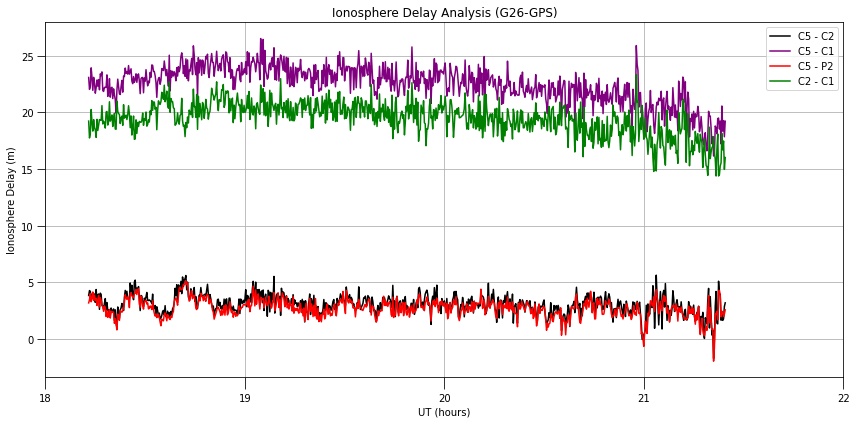

In [66]:
mask = (df_final['sv'] == 'G26') & (df_final['arc'] > 1)

year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
if last_hour < 23:
    last_hour = last_hour+1

plt.figure(figsize=(12, 6))

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks a cada 1 hora
#plt.gca().set_xticklabels(['0','3','6','9','12','15','18','21','24'], minor=False)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

# Gráficos
plt.plot(df_final[mask]['time'], df_final[mask]['C5'] - df_final[mask]['C2'], color='black', label='C5 - C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5'] - df_final[mask]['C1'], color='purple', label='C5 - C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5'] - df_final[mask]['P2'], color='red', label='C5 - P2')
#plt.plot(df_final[mask]['time'], df_final[mask]['C5'] - df_final[mask]['P1'], color='blue', label='C5 - P1')
##plt.plot(df_final[mask]['time'], df_final[mask]['C2'] - df_final[mask]['P2'], color='yellow', label='C2 - P2')
#plt.plot(df_final[mask]['time'], df_final[mask]['C2'] - df_final[mask]['P1'], color='brown', label='C2 - P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C2'] - df_final[mask]['C1'], color='green', label='C2 - C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C1'] - df_final[mask]['P1'], color='orange', label='C1 - P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5'] - df_final[mask]['CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5'] - df_final[mask]['CS1'], color='gray', label='CS5 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5'] - df_final[mask]['PS2'], color='blue', label='CS5 - PS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5'] - df_final[mask]['PS1'], color='black', label='CS5 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2'] - df_final[mask]['PS2'], color='gray', label='CS2 - PS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2'] - df_final[mask]['PS1'], color='magenta', label='CS2 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2'] - df_final[mask]['CS1'], color='red', label='CS2 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS1'] - df_final[mask]['PS1'], color='yellow', label='CS1 - PS1')

plt.title("Ionosphere Delay Analysis (G26-GPS)")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.grid()


plt.legend()#(loc="upper left") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()


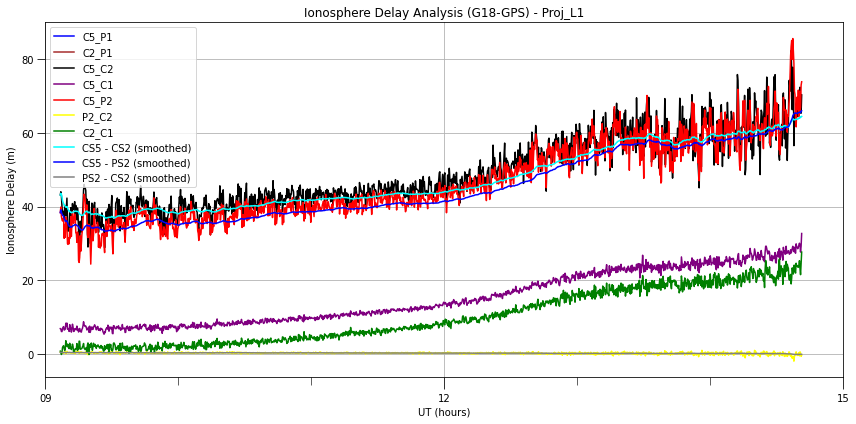

In [67]:
mask = (df_final['sv'] == 'G18') & (df_final['arc'] > 0)

year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
if last_hour < 23:
    last_hour = last_hour+1 #1 hour up, to get better visualization on grafhs

plt.figure(figsize=(12, 6))

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks a cada 3 horas
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))   # Minor ticks a cada 1 hora
#plt.gca().set_xticklabels(['0','3','6','9','12','15','18','21','24'], minor=False)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

# Gráficos
plt.plot(df_final[mask]['time'], df_final[mask]['C5_P1'], color='blue', label='C5_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='brown', label='C2_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C1_P1'], color='orange', label='C1_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
plt.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
plt.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='gray', label='CS5 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS1'], color='black', label='CS5 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_PS1'], color='magenta', label='CS2 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_CS1'], color='red', label='CS2 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS1_PS1'], color='yellow', label='CS1 - PS1')

plt.title("Ionosphere Delay Analysis (G18-GPS) - Proj_L1")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.grid()


plt.legend()#(loc="lower right") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()

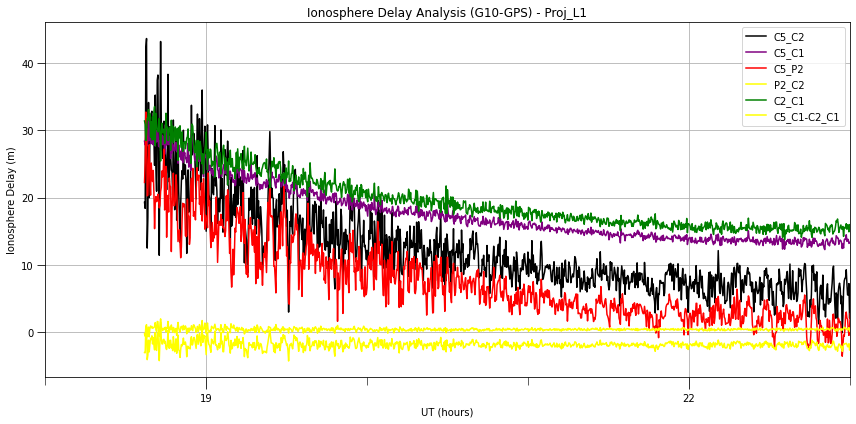

In [68]:
mask = (df_final['sv']=='G01') & (df_final['arc'] > 0)

year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
if last_hour < 23:
    last_hour = last_hour+1 #1 hour up, to get better visualization on grafhs

plt.figure(figsize=(12, 6))

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks a cada 3 horas
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))   # Minor ticks a cada 1 hora
#plt.gca().set_xticklabels(['0','3','6','9','12','15','18','21','24'], minor=False)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

# Gráficos
##plt.plot(df_final[mask]['time'], df_final[mask]['C5_P1'], color='blue', label='C5_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='brown', label='C2_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C1_P1'], color='orange', label='C1_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
plt.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1']-df_final[mask]['C2_C1'], color= 'yellow', label='C5_C1-C2_C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='gray', label='CS5 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS1'], color='black', label='CS5 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_PS1'], color='magenta', label='CS2 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_CS1'], color='red', label='CS2 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS1_PS1'], color='yellow', label='CS1 - PS1')

plt.title("Ionosphere Delay Analysis (G10-GPS) - Proj_L1")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.grid()


plt.legend()#(loc="lower right") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()

#delay
#DCB

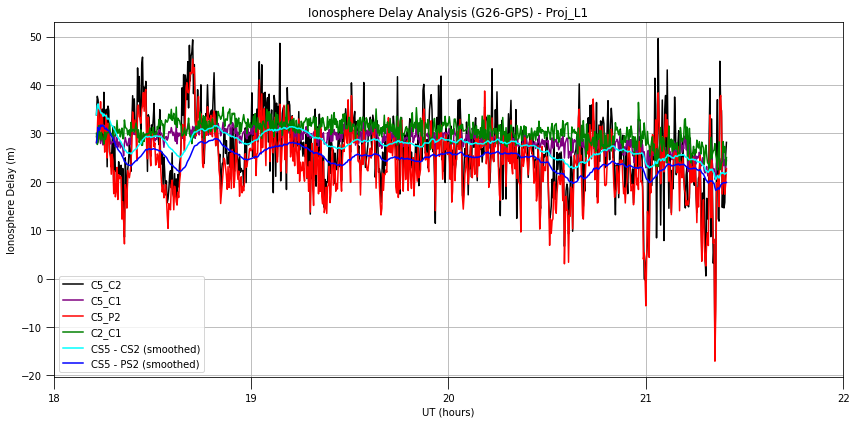

In [69]:
mask = (df_final['sv']=='G26') & (df_final['arc'] > 1)

year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
if last_hour < 23:
    last_hour = last_hour+1 #1 hour up, to get better visualization on grafhs

plt.figure(figsize=(12, 6))

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks a cada 1 hora
#plt.gca().set_xticklabels(['0','3','6','9','12','15','18','21','24'], minor=False)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

# Gráficos
#plt.plot(df_final[mask]['time'], df_final[mask]['C5_P1'], color='blue', label='C5_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='brown', label='C2_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C1_P1'], color='orange', label='C1_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
##plt.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
##plt.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='gray', label='CS5 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS1'], color='black', label='CS5 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_PS1'], color='magenta', label='CS2 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_CS1'], color='red', label='CS2 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS1_PS1'], color='yellow', label='CS1 - PS1')

plt.title("Ionosphere Delay Analysis (G26-GPS) - Proj_L1")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.grid()


plt.legend()#(loc="lower right") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()

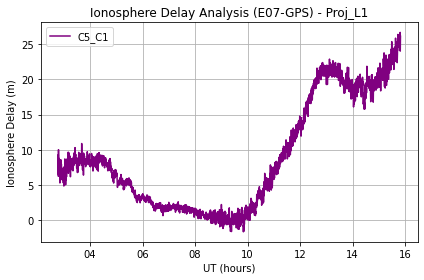

In [70]:
mask = (df_final['sv']=='E07')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# Gráficos
#plt.plot(df_final[mask]['time'], df_final[mask]['C5_P1'], color='blue', label='C5_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='brown', label='C2_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['P1_C1'], color='orange', label='P1_C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
#plt.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
#plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='gray', label='CS5 - CS1 (smoothed)')


plt.title("Ionosphere Delay Analysis (E07-GPS) - Proj_L1")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
#plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.grid()


plt.legend()#(loc="lower right") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()

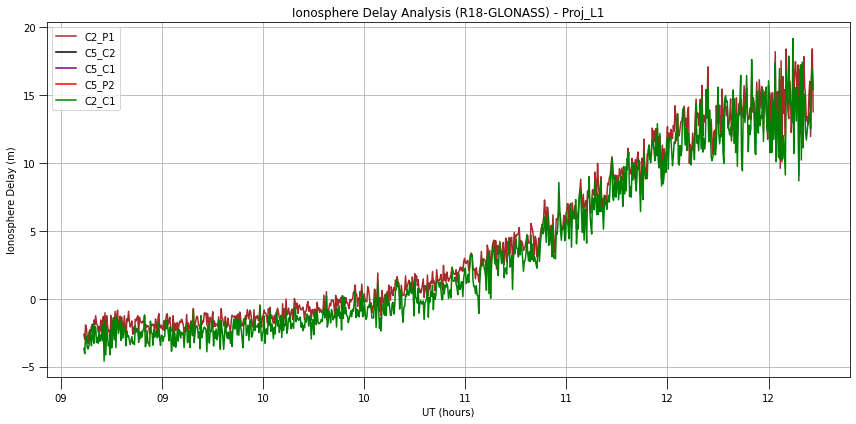

In [71]:
mask = (df_final['sv']=='R18') & (df_final['arc'] > 0)


plt.figure(figsize=(12, 6))

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks a cada 3 horas
#plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))   # Minor ticks a cada 1 hora
#plt.gca().set_xticklabels(['0','3','6','9','12','15','18','21','24'], minor=False)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

# Gráficos
#plt.plot(df_final[mask]['time'], df_final[mask]['C5_P1'], color='blue', label='C5_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='brown', label='C2_P1')
#plt.plot(df_final[mask]['time'], df_final[mask]['C1_P1'], color='orange', label='C1_P1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
#plt.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2_CS2 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='gray', label='CS5 - CS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS5_PS1'], color='black', label='CS5 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_PS1'], color='magenta', label='CS2 - PS1')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS2_CS1'], color='red', label='CS2_CS1 (smoothed)')
#plt.plot(df_final[mask]['time'], df_final[mask]['CS1_PS1'], color='yellow', label='CS1 - PS1')

plt.title("Ionosphere Delay Analysis (R18-GLONASS) - Proj_L1")
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')

plt.grid()


plt.legend()#(loc="lower right") #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# Ajuste do layout
plt.tight_layout()
plt.show()

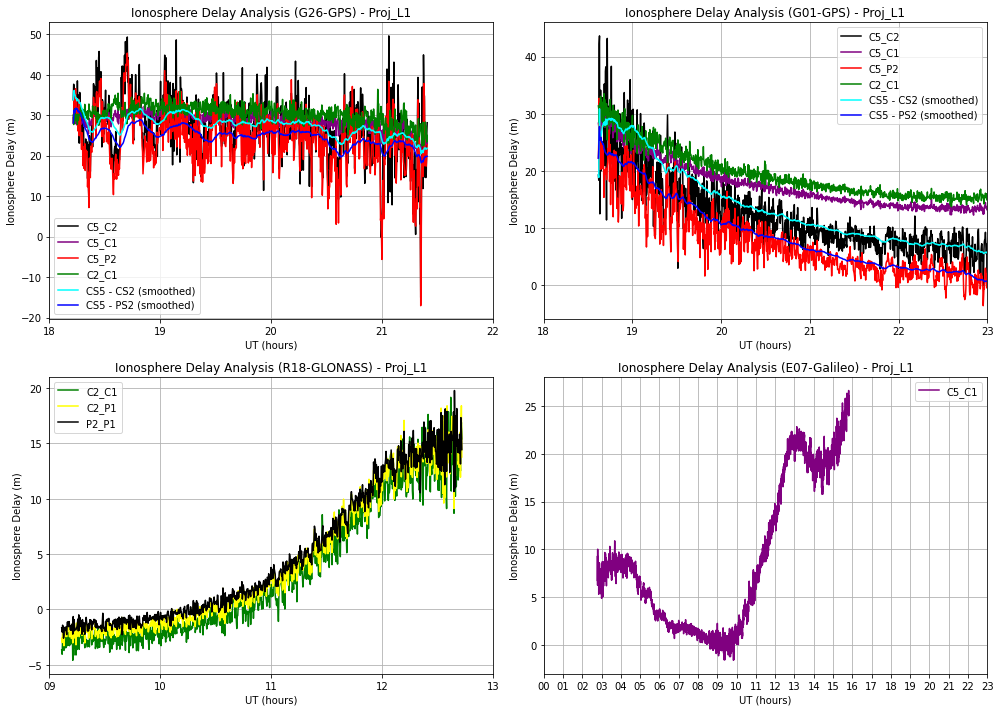

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  #2x2 para os subplots

datasets = [
    ('G26', "Ionosphere Delay Analysis (G26-GPS) - Proj_L1"),
    ('G01', "Ionosphere Delay Analysis (G01-GPS) - Proj_L1"),
    ('R18', "Ionosphere Delay Analysis (R18-GLONASS) - Proj_L1"),
    ('E07', "Ionosphere Delay Analysis (E07-Galileo) - Proj_L1")
]

for i, (sv_value, title) in enumerate(datasets):
    row, col = divmod(i, 2)
    if sv_value == 'G26':
        mask = (df_final['sv'] == sv_value) & (df_final['arc'] > 1)
    elif sv_value == 'E07':
        mask = (df_final['sv'] == sv_value)
    else:
        mask = (df_final['sv'] == sv_value) & (df_final['arc'] > 0)
    year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
    if last_hour < 23:
        last_hour += 1
    
    ax = axs[row, col]
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    
    ax1 = axs[row, col]
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))

    ax2 = axs[row, col]
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

    if sv_value in ['G01', 'G26']:
        ax1.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
        ax1.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
        ax1.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
        #ax1.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='yellow', label='C5_P1')
        ##ax1.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
        ax1.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
        ax1.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
        ax1.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
        ##ax1.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
    elif sv_value == 'R18':
        ##ax.plot(df_final[mask]['time'], df_final[mask]['P2_C2'], color='yellow', label='P2_C2')
        #ax.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
        #ax.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
        #ax.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
        ax.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
        ax.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='yellow', label='C2_P1')
        ax.plot(df_final[mask]['time'], df_final[mask]['P2_P1'], color='black', label='P2_P1')
        #ax.plot(df_final[mask]['time'], df_final[mask]['CS2_CS1'], color='cyan', label='CS5 - CS2 (smoothed)')
        #ax.plot(df_final[mask]['time'], df_final[mask]['PS2_PS1'], color='blue', label='CS5 - PS2 (smoothed)')
        #ax.plot(df_final[mask]['time'], df_final[mask]['CS2_PS1'], color='Pink', label='CS5 - PS2 (smoothed)')
        ##ax.plot(df_final[mask]['time'], df_final[mask]['PS2_CS2'], color='gray', label='PS2 - CS2 (smoothed)')
    elif sv_value == 'E07':
        ax2.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')

    ax.set_title(title)
    ax.set_xlabel('UT (hours)')
    ax.set_ylabel('Ionosphere Delay (m)')
    ax.set_xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()


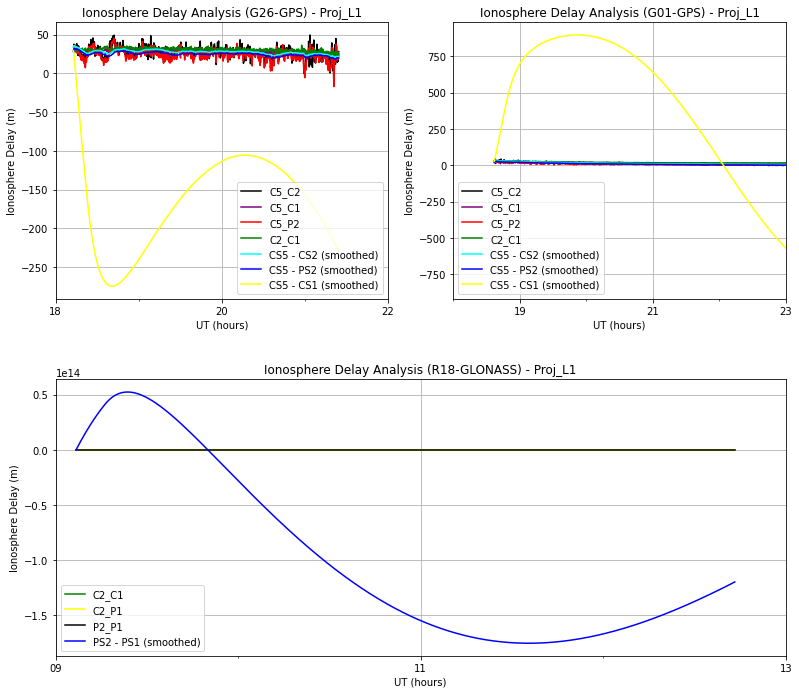

In [73]:
import matplotlib.gridspec as gridspec

# Criar figura com layout personalizado
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Posições dos subplots:
# - Primeira linha: dois gráficos normais (colspan=1)
# - Segunda linha: um gráfico centralizado (colspan=2)
ax1 = plt.subplot(gs[0, 0])  # G26
ax2 = plt.subplot(gs[0, 1])  # G01
ax3 = plt.subplot(gs[1, :])  # R18 (ocupa todas as colunas da segunda linha)

# Lista com os datasets e seus respectivos eixos
datasets = [
    ('G26', "Ionosphere Delay Analysis (G26-GPS) - Proj_L1", ax1),
    ('G01', "Ionosphere Delay Analysis (G01-GPS) - Proj_L1", ax2),
    ('R18', "Ionosphere Delay Analysis (R18-GLONASS) - Proj_L1", ax3)
]

for sv_value, title, ax in datasets:
    if sv_value == 'G26':
        mask = (df_final['sv'] == sv_value) & (df_final['arc'] > 1)
    else:
        mask = (df_final['sv'] == sv_value) & (df_final['arc'] > 0)
    
    year, month, day, first_hour, last_hour = extract_date_components(df_final[mask], 'time')
    if last_hour < 23:
        last_hour += 1
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

    if sv_value in ['G01', 'G26']:
        ax.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='black', label='C5_C2')
        ax.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='purple', label='C5_C1')
        ax.plot(df_final[mask]['time'], df_final[mask]['C5_P2'], color='red', label='C5_P2')
        ax.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
        ax.plot(df_final[mask]['time'], df_final[mask]['CS5_CS2'], color='cyan', label='CS5 - CS2 (smoothed)')
        ax.plot(df_final[mask]['time'], df_final[mask]['CS5_PS2'], color='blue', label='CS5 - PS2 (smoothed)')
        ax.plot(df_final[mask]['time'], df_final[mask]['CS5_CS1'], color='yellow', label='CS5 - CS1 (smoothed)')
    elif sv_value == 'R18':
        ax.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='green', label='C2_C1')
        ax.plot(df_final[mask]['time'], df_final[mask]['C2_P1'], color='yellow', label='C2_P1')
        ax.plot(df_final[mask]['time'], df_final[mask]['P2_P1'], color='black', label='P2_P1')
        ax.plot(df_final[mask]['time'], df_final[mask]['PS2_PS1'], color='blue', label='PS2 - PS1 (smoothed)')

    ax.set_title(title)
    ax.set_xlabel('UT (hours)')
    ax.set_ylabel('Ionosphere Delay (m)')
    ax.set_xlim([datetime.datetime(year, month, day, first_hour, 0), 
                 datetime.datetime(year, month, day, last_hour, 0)])
    ax.grid()
    ax.legend()

# Ajustar o tamanho do gráfico centralizado
ax3.set_position([0.2, 0.1, 0.9, 0.4])  # Gráfico mais estreito  # [left, bottom, width, height]

plt.tight_layout()
plt.show()

In [74]:
def calc_equation_on_arcs(df, sat_list, list_code, list_phase):

    #colunas para armazenar os resultados para cada combinação de código e fase
    for code in list_code:
        for phase in list_phase:
            col_name = f'W_{code}_{phase}'
            if col_name not in df.columns:
                df[col_name] = np.nan

    for sat in sat_list:
        #Mask para selecionar dados do satélite atual
        mask_sat = df['sv'] == sat

        #Identifica os arcos únicos para o satélite
        arcs = df[mask_sat][df[mask_sat]['arc'] != 0]['arc'].unique()
        #apenas as linhas onde o valor de arc é diferente de zero.
        #valores únicos de arc para o satélite atual
        #print(arcs)

        for arc in arcs:
            #Massk para selecionar dados do arco atual
            mask_arc = (df['sv'] == sat) & (df['arc'] == arc)
            #máscara que seleciona as linhas onde sv é igual ao satélite atual e arc é igual ao arco atual
            #print(mask_arc)

            #Calcula Narc
            Narc = mask_arc.sum()
            #numero total de medições para o arco atual
            
            if Narc > 0:
                for code in list_code:
                    for phase in list_phase:
                        col_name = f'W_{code}_{phase}'
                        if code in df.columns and phase in df.columns:
                            #Calcula W
                            sum_diff = (df.loc[mask_arc, code] - df.loc[mask_arc, phase]).sum()
                            W = (1 / Narc) * sum_diff
                            print('W=', W)

                            df.loc[mask_arc, col_name] = W

    return df


In [75]:
calc_equation_on_arcs(df_final, sv_GPS, list_code, list_phase)
calc_equation_on_arcs(df_final, sv_GALILEO, list_code, list_phase)
calc_equation_on_arcs(df_final, sv_GLONASS, list_code, list_phase)

W= -92339143.74156739
W= -67161528.80902523
W= -63458884.622073285
W= -92339131.37959969
W= -67161516.44705753
W= -63458872.2601056
W= -92339130.03168479
W= -67161515.09914264
W= -63458870.9121907
W= 0.0
W= 0.0
W= 0.0
W= -92339130.84919858
W= -67161515.91665642
W= -63458871.72970449
W= -94998302.8571785
W= -69095486.32361911
W= -65286253.84782525
W= -94998296.51775056
W= -69095479.9841912
W= -65286247.5083973
W= -94998290.95173714
W= -69095474.41817775
W= -65286241.94238386
W= 0.0
W= 0.0
W= 0.0
W= -94998296.26789546
W= -69095479.73433608
W= -65286247.258542195
W= -93461738.85001685
W= -67977932.94231927
W= -64230345.09591359
W= -93461726.5535195
W= -67977920.64582191
W= -64230332.79941622
W= -93461725.2364826
W= -67977919.32878503
W= -64230331.48237934
W= 0.0
W= 0.0
W= 0.0
W= -93461726.17447312
W= -67977920.26677555
W= -64230332.420369856
W= -104292470.11865188
W= -75855458.51461278
W= -71673574.91259973
W= -104292450.68016818
W= -75855439.07612906
W= -71673555.47411603
W= -104292447.6

,sv,Time_Sec,time,C1,C2,C5,P1,P2,L1,L2,...,W_C2_L5,W_C5_L1,W_C5_L2,W_C5_L5,W_P1_L1,W_P1_L2,W_P1_L5,W_P2_L1,W_P2_L2,W_P2_L5
0,E02,0.0,2024-01-01 00:00:00,2.370340e+07,NaN,2.370340e+07,NaN,NaN,1.245624e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E02,15.0,2024-01-01 00:00:15,2.370124e+07,NaN,2.370124e+07,NaN,NaN,1.245510e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E02,30.0,2024-01-01 00:00:30,2.369909e+07,NaN,2.369910e+07,NaN,NaN,1.245398e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E02,45.0,2024-01-01 00:00:45,2.369696e+07,NaN,2.369697e+07,NaN,NaN,1.245286e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E02,60.0,2024-01-01 00:01:00,2.369485e+07,NaN,2.369485e+07,NaN,NaN,1.245175e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455035,R24,86325.0,2024-01-01 23:58:45,2.263974e+07,2.263975e+07,NaN,2.263974e+07,2.263975e+07,1.210651e+08,9.416167e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455036,R24,86340.0,2024-01-01 23:59:00,2.263964e+07,2.263965e+07,NaN,2.263964e+07,2.263965e+07,1.210646e+08,9.416124e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455037,R24,86355.0,2024-01-01 23:59:15,2.263956e+07,2.263956e+07,NaN,2.263955e+07,2.263956e+07,1.210641e+08,9.416089e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455038,R24,86370.0,2024-01-01 23:59:30,2.263949e+07,2.263949e+07,NaN,2.263949e+07,2.263949e+07,1.210637e+08,9.416060e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


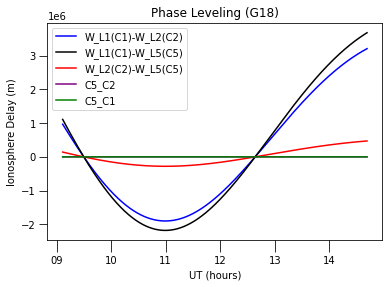

In [76]:
mask = (df_final['sv']=='G18') & (df_final['arc'] > 0)

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks a cada 1 hora

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

W_C1_L1= df_final[mask]['L1']+df_final[mask]['W_C1_L1']
W_C2_L2= df_final[mask]['L2']+df_final[mask]['W_C2_L2']
W_C5_L5= df_final[mask]['L5']+df_final[mask]['W_C5_L5']

#plt.plot(df_final[mask]['time'], W_C2_L2, color='black', label='L2(C2)')
#plt.plot(df_final[mask]['time'], W_C5_L5, color='red', label='L5(C1)')

plt.plot(df_final[mask]['time'], W_C1_L1-W_C2_L2, color='blue', label='W_L1(C1)-W_L2(C2)') 
plt.plot(df_final[mask]['time'], W_C1_L1-W_C5_L5, color='black', label='W_L1(C1)-W_L5(C5)')
plt.plot(df_final[mask]['time'], W_C2_L2-W_C5_L5, color='red', label='W_L2(C2)-W_L5(C5)')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C2'], color='purple', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['C5_C1'], color='green', label='C5_C1')

plt.title('Phase Leveling (G18)')
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
#plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.legend()


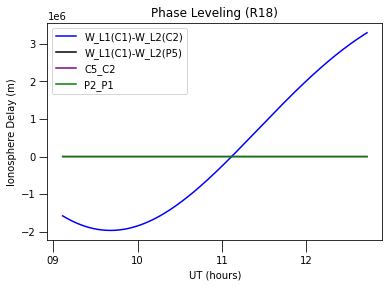

In [77]:
mask = (df_final['sv']=='R18') & (df_final['arc'] > 0)

#xaxis formater
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks a cada 1 hora

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')

W_C1_L1= df_final[mask]['L1']+df_final[mask]['W_C1_L1']
W_C2_L2= df_final[mask]['L2']+df_final[mask]['W_C2_L2']
W_C5_L5= df_final[mask]['L5']+df_final[mask]['W_C5_L5']
W_P1_L1= df_final[mask]['L5']+df_final[mask]['W_P1_L1']
W_P2_L2= df_final[mask]['L5']+df_final[mask]['W_P2_L2']

#plt.plot(df_final[mask]['time'], W_C2_L2, color='black', label='L2(C2)')
#plt.plot(df_final[mask]['time'], W_C5_L5, color='red', label='L5(C1)')

plt.plot(df_final[mask]['time'], W_C1_L1-W_C2_L2, color='blue', label='W_L1(C1)-W_L2(C2)') 
plt.plot(df_final[mask]['time'], W_P1_L1-W_P2_L2, color='black', label='W_L1(C1)-W_L2(P5)')
#plt.plot(df_final[mask]['time'], W_C2_L2-W_C5_L5, color='red', label='W_L2(C2)-W_L5(C5)')
plt.plot(df_final[mask]['time'], df_final[mask]['C2_C1'], color='purple', label='C5_C2')
plt.plot(df_final[mask]['time'], df_final[mask]['P2_P1'], color='green', label='P2_P1')


plt.title('Phase Leveling (R18)')
plt.xlabel('UT (hours)')
plt.ylabel('Ionosphere Delay (m)')
#plt.xlim([datetime.datetime(year, month, day, first_hour, 0), datetime.datetime(year, month, day, last_hour, 0)])

plt.legend()


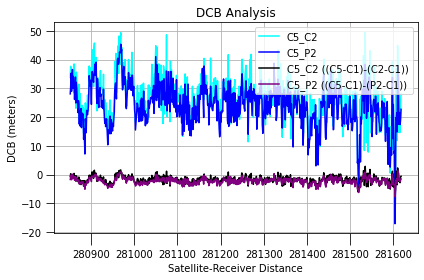

In [78]:
mask = (df_final['sv']=='G26') & (df_final['arc'] > 1)

plt.gca().tick_params(axis='x', which='major', length=12, direction='out')
plt.gca().tick_params(axis='y', which='major', length=8, direction='out')
plt.gca().tick_params(axis='both', which='minor', length=8, direction='out')


plt.plot(df_final[mask]['C5_C2'], color= 'cyan', label='C5_C2')
plt.plot(df_final[mask]['C5_P2'], color= 'blue', label='C5_P2')
##plt.plot(df_final[mask]['C2_C1'], color= 'yellow', label='C2_C1')
##plt.plot(((df_final[mask]['C5_C2']) - (df_final[mask]['C5_C1'])), color='green', label='C2_C1 ((C5-C2)-(C5-C1))')   # C2-C1  *-1
plt.plot((df_final[mask]['C5_C1']) - (df_final[mask]['C2_C1']), color='black', label='C5_C2 ((C5-C1)-(C2-C1))')   # C5-C2
plt.plot((df_final[mask]['C5_C1']) - (df_final[mask]['P2_C1']), color='purple', label='C5_P2 ((C5-C1)-(P2-C1))')   # C5-P2
##plt.plot(df_final[mask]['CS5_PS2'], color= 'red', label='CS5_PS2')
#plt.plot((df_final[mask]['P2_C1']) - (df_final[mask]['C2_C1']), color='red', label='P2_C2 ((P2-C1)-(C2-C1))') # P2-C2
#plt.plot(df_final[mask]['P2_C2'], color= 'green', label='P2_C2')


#plt.plot(((df_final[mask]['C5_C2']) - ((df_final[mask]['C5_C1']) - (df_final[mask]['C2_C1']))), color='red', label='C5_C2 - (C5-C1)-(C2-C1)')   # C5-C2

plt.title('DCB Analysis')
plt.ylabel('DCB (meters)')
plt.xlabel('Satellite-Receiver Distance')


plt.grid()
plt.tight_layout()
plt.legend()

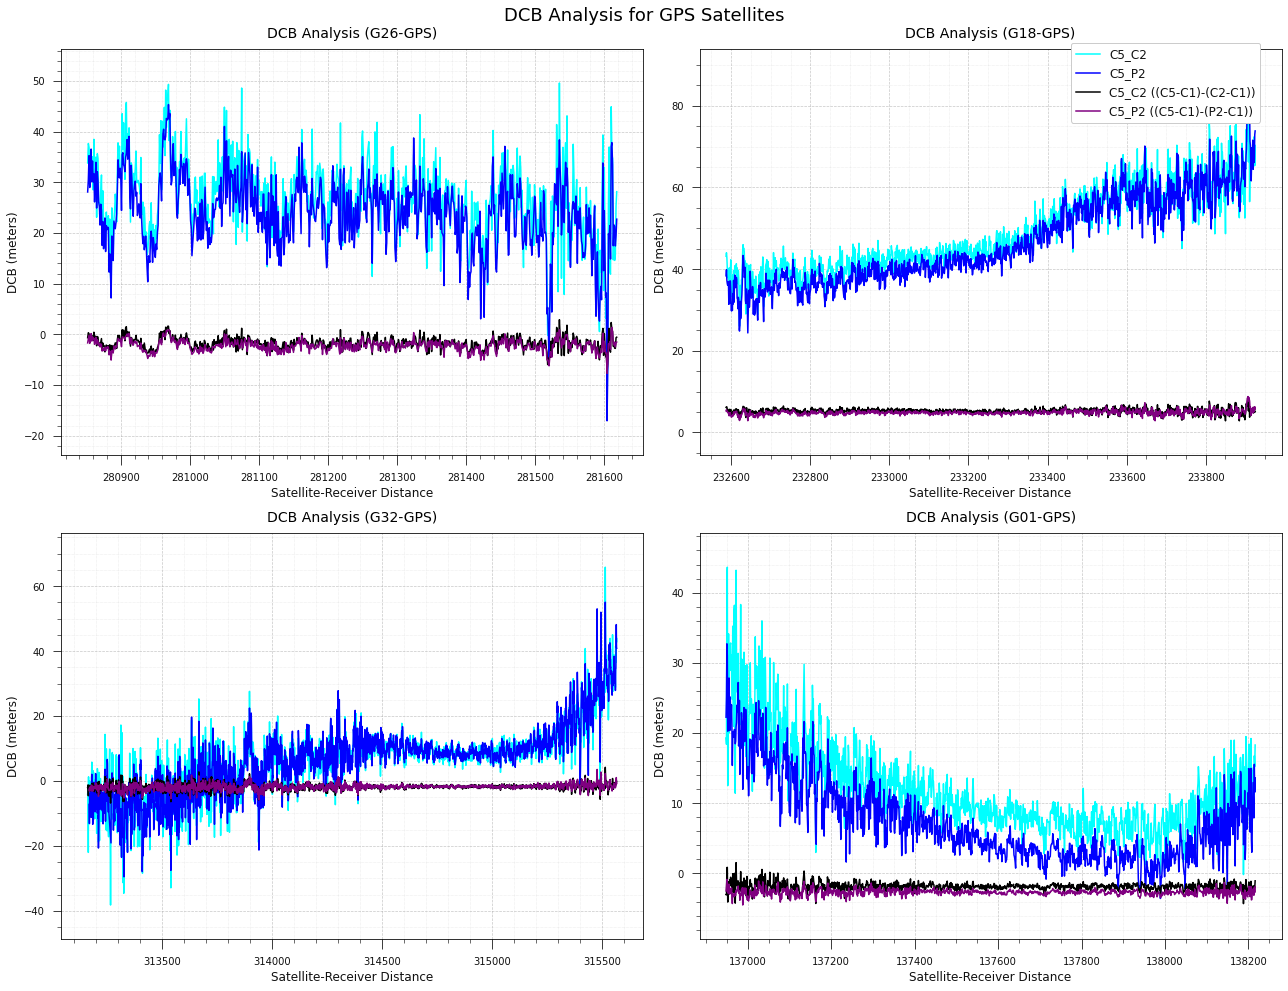

In [79]:
from matplotlib.ticker import AutoMinorLocator

# Configuração de cores dos textos
TEXT_COLOR = '#111111'  # Cinza muito escuro (quase preto)
TITLE_COLOR = '#000000'  # Preto puro para títulos

# Configuração da figura
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis for GPS Satellites', fontsize=18, y=0.98, color=TITLE_COLOR)

# Lista de satélites e eixos correspondentes com condições específicas
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'] == 'G26') & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'] == 'G18') & (df['arc'] > 0)),
    ('G32', axs[1, 0], lambda df: (df['sv'] == 'G32')),  # Sem filtro de arc
    ('G01', axs[1, 1], lambda df: (df['sv'] == 'G01') & (df['arc'] > 0))
]

# Cores e estilos consistentes para as linhas
plot_config = {
    'C5_C2': {'color': 'cyan', 'label': 'C5_C2'},
    'C5_P2': {'color': 'blue', 'label': 'C5_P2'},
    'combo1': {'color': 'black', 'label': 'C5_C2 ((C5-C1)-(C2-C1))'},
    'combo2': {'color': 'purple', 'label': 'C5_P2 ((C5-C1)-(P2-C1))'}
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    
    # Verificar e tratar dados ausentes
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12, transform=ax.transAxes)
        ax.set_title(f'DCB Analysis ({sv_value}-GPS)', fontsize=14, color=TITLE_COLOR, pad=12)
        ax.set_facecolor('#f0f0f0')
        continue
    
    # Configuração avançada dos eixos com cores escuras
    ax.tick_params(axis='both', which='major', labelsize=10, colors=TEXT_COLOR)
    ax.tick_params(axis='x', which='major', length=10, direction='out', pad=8, colors=TEXT_COLOR)
    ax.tick_params(axis='y', which='major', length=8, direction='out', pad=8, colors=TEXT_COLOR)
    ax.tick_params(axis='both', which='minor', length=4, direction='out', colors=TEXT_COLOR)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Plotagem dos dados com tratamento de NaN
    valid_data = df_final[mask].copy()
    
    ax.plot(valid_data['C5_C2'].dropna(), **plot_config['C5_C2'])
    ax.plot(valid_data['C5_P2'].dropna(), **plot_config['C5_P2'])
    
    combo1 = (valid_data['C5_C1'] - valid_data['C2_C1']).dropna()
    ax.plot(combo1, **plot_config['combo1'])
    
    combo2 = (valid_data['C5_C1'] - valid_data['P2_C1']).dropna()
    ax.plot(combo2, **plot_config['combo2'])
    
    # Configurações do gráfico com cores escuras
    ax.set_title(f'DCB Analysis ({sv_value}-GPS)', fontsize=14, pad=12, color=TITLE_COLOR)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    # Grade estilizada
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Cálculo automático dos limites com margem
    y_data = np.concatenate([
        valid_data['C5_C2'].dropna().values,
        valid_data['C5_P2'].dropna().values,
        combo1.values,
        combo2.values
    ])
    
    if len(y_data) > 0:
        y_min, y_max = np.nanmin(y_data), np.nanmax(y_data)
        margin = max(0.1, 0.1 * (y_max - y_min))  # Margem mínima de 0.1
        ax.set_ylim([y_min - margin, y_max + margin])

# Configuração unificada da legenda com texto escuro
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', 
           bbox_to_anchor=(0.98, 0.95), fontsize=12, framealpha=1,
           labelcolor=TEXT_COLOR)

# Ajustes finais de layout
plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, 
                    hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()

-1.862451667608746

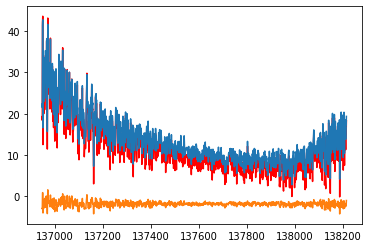

In [80]:
valid_data['C5_C2'].dropna().plot(color='red')
(valid_data['C5_C2'].dropna() - combo1).plot()
combo1.plot()

combo1.mean()

Média C5_C2: -1.7482 metros
Média C5_P2: -2.2452 metros


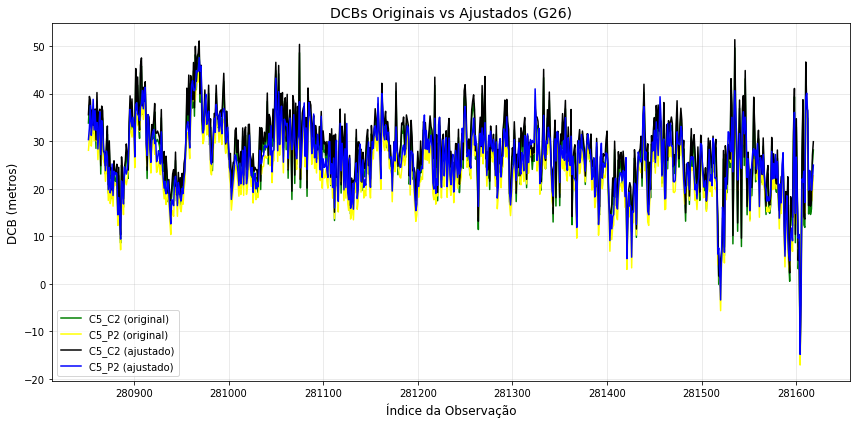

In [81]:
# Supondo que df_final já está carregado com seus dados

# 1. Definir a máscara para filtrar os dados (G26 e arcos > 1)
mask = (df_final['sv'] == 'G26') & (df_final['arc'] > 1)

# 2. Calcular os DCBs usando as combinações de observáveis
C5_C2_DCB = df_final[mask]['C5_C1'] - df_final[mask]['C2_C1']  # DCB C5-C2
C5_P2_DCB = df_final[mask]['C5_C1'] - df_final[mask]['P2_C1']  # DCB C5-P2

# 3. Calcular as médias dos DCBs
media_C5_C2 = C5_C2_DCB.mean()
media_C5_P2 = C5_P2_DCB.mean()

print(f"Média C5_C2: {media_C5_C2:.4f} metros")
print(f"Média C5_P2: {media_C5_P2:.4f} metros")

# 4. Subtrair as médias dos dados originais
C5_C2_ajustado = df_final[mask]['C5_C2'] - media_C5_C2
C5_P2_ajustado = df_final[mask]['C5_P2'] - media_C5_P2

# 5. Plotar os resultados
plt.figure(figsize=(12, 6))

# Dados originais
plt.plot(df_final[mask]['C5_C2'], color='green', label='C5_C2 (original)')
plt.plot(df_final[mask]['C5_P2'], color='yellow', label='C5_P2 (original)')

# Dados ajustados (subtraindo a média)
plt.plot(C5_C2_ajustado, color='black', linewidth=1.5, label=f'C5_C2 (ajustado)')
plt.plot(C5_P2_ajustado, color='blue', linewidth=1.5, label=f'C5_P2 (ajustado)')

# Configurações do gráfico
plt.title('DCBs Originais vs Ajustados (G26)', fontsize=14)
plt.ylabel('DCB (metros)', fontsize=12)
plt.xlabel('Índice da Observação', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

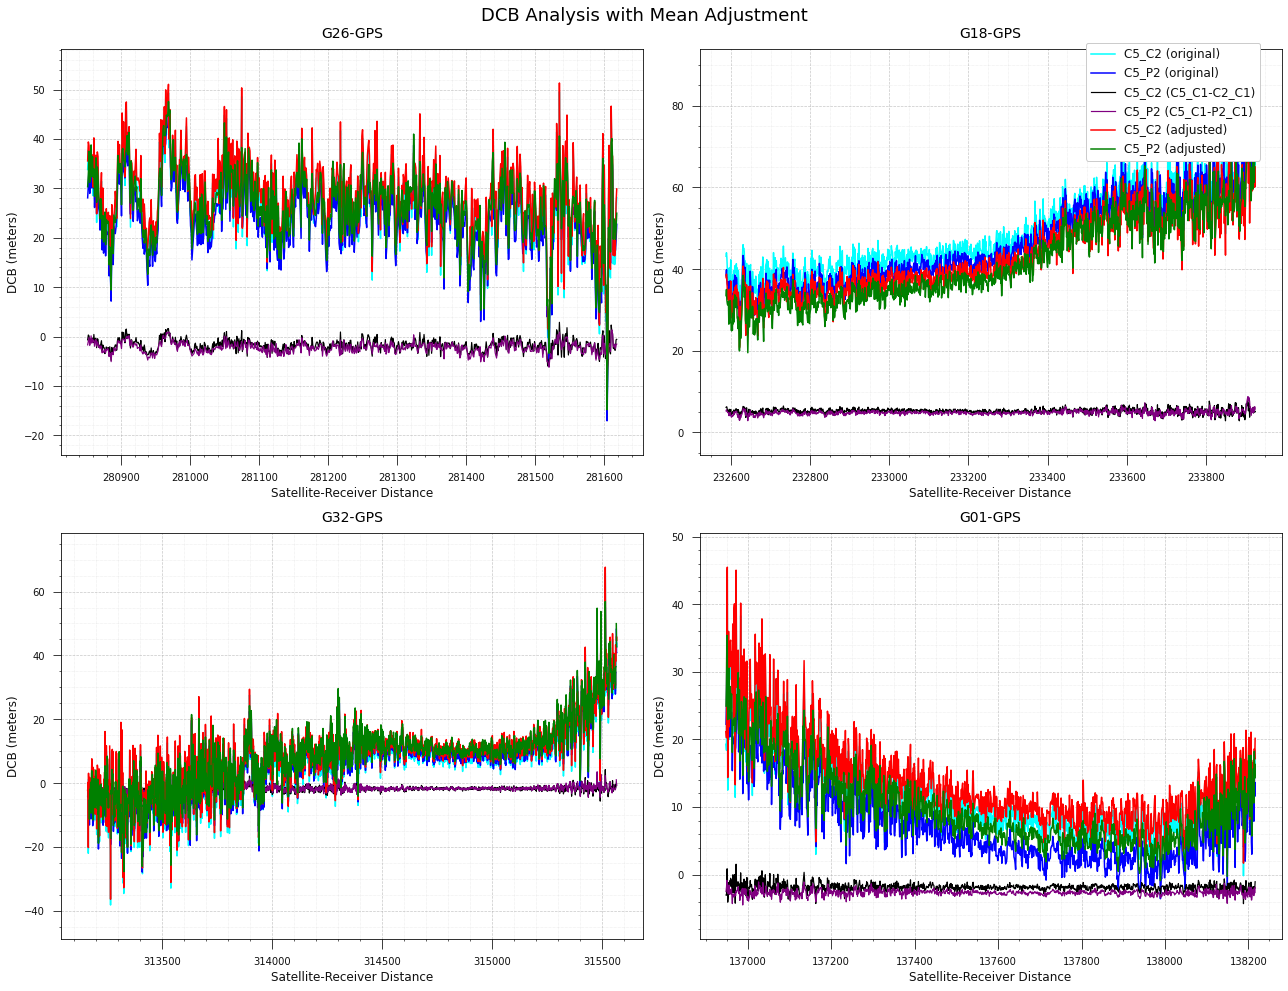

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

# Configurações por satélite
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'] == 'G26') & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'] == 'G18') & (df['arc'] > 0)),
    ('G32', axs[1, 0], lambda df: (df['sv'] == 'G32')),
    ('G01', axs[1, 1], lambda df: (df['sv'] == 'G01') & (df['arc'] > 0))
]

# Configurações de plotagem (sem linhas pontilhadas)
plot_config = {
    'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
    'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
    'combo_C5_C2': {'color': 'black', 'label': 'C5_C2 (C5_C1-C2_C1)', 'linewidth': 1.2},
    'combo_C5_P2': {'color': 'purple', 'label': 'C5_P2 (C5_C1-P2_C1)', 'linewidth': 1.2},
    'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
    'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5}
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    
    # Pular se não houver dados
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-GPS', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    # Calcular DCBs
    combo_C5_C2 = valid_data['C5_C1'] - valid_data['C2_C1']
    combo_C5_P2 = valid_data['C5_C1'] - valid_data['P2_C1']
    
    # Calcular médias
    mean_C5_C2 = combo_C5_C2.mean()
    mean_C5_P2 = combo_C5_P2.mean()
    
    # Ajustar dados originais subtraindo as médias
    adjusted_C5_C2 = valid_data['C5_C2'] - mean_C5_C2
    adjusted_C5_P2 = valid_data['C5_P2'] - mean_C5_P2
    
    # Plotagem (todas linhas sólidas)
    ax.plot(valid_data['C5_C2'], **plot_config['original_C5_C2'])
    ax.plot(valid_data['C5_P2'], **plot_config['original_C5_P2'])
    ax.plot(combo_C5_C2, **plot_config['combo_C5_C2'])
    ax.plot(combo_C5_P2, **plot_config['combo_C5_P2'])
    ax.plot(adjusted_C5_C2, **plot_config['adjusted_C5_C2'])
    ax.plot(adjusted_C5_P2, **plot_config['adjusted_C5_P2'])
    
    # Configurações do gráfico
    ax.set_title(f'{sv_value}-GPS', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    # Configuração dos eixos
    ax.tick_params(axis='both', which='major', labelsize=10, colors=TEXT_COLOR)
    ax.tick_params(axis='x', which='major', length=10, direction='out', pad=8)
    ax.tick_params(axis='y', which='major', length=8, direction='out', pad=8)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Grade
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Ajuste automático dos limites do eixo y
    y_data = np.concatenate([
        valid_data['C5_C2'].values,
        valid_data['C5_P2'].values,
        combo_C5_C2.values,
        combo_C5_P2.values,
        adjusted_C5_C2.values,
        adjusted_C5_P2.values
    ])
    
    if len(y_data) > 0:
        y_min, y_max = np.nanmin(y_data), np.nanmax(y_data)
        margin = max(0.1, 0.1 * (y_max - y_min))
        ax.set_ylim([y_min - margin, y_max + margin])

# Legenda unificada
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', 
           bbox_to_anchor=(0.98, 0.95), fontsize=12, framealpha=1,
           labelcolor=TEXT_COLOR)

# Ajuste de layout
plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, 
                    hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()

In [83]:
'''

# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

# Configurações por satélite (G=GPS, R=GLONASS)
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

# Configurações de plotagem simplificadas (apenas original e adjusted)
plot_config = {
    'GPS': {
        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
        'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5}
    },
    'GLONASS': {
        'original_C2_C1': {'color': 'orange', 'label': 'C2_C1 (original)', 'linewidth': 1.5},
        'adjusted_C2_C1': {'color': 'black', 'label': 'C2_C1 (adjusted)', 'linewidth': 1.5},
        'original_C2_P1': {'color': 'magenta', 'label': 'C2_P1 (original)', 'linewidth': 1.5},
        'adjusted_C2_P1': {'color': 'cyan', 'label': 'C2_P1 (adjusted)', 'linewidth': 1.5},
        'original_P2_P1': {'color': 'brown', 'label': 'P2_P1 (original)', 'linewidth': 1.5},
        'adjusted_P2_P1': {'color': 'yellow', 'label': 'P2_P1 (adjusted)', 'linewidth': 1.5}
    }
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    
    # Pular se não houver dados
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        if constel == 'GLONASS':  # GLONASS (R18)
            # Calcular médias
            mean_C2_C1 = np.nanmean(valid_data['C2_C1'])
            mean_C2_P1 = np.nanmean(valid_data['C2_P1'])
            mean_P2_P1 = np.nanmean(valid_data['P2_P1'])
            
            # Calcular valores ajustados
            adjusted_C2_C1 = (valid_data['C2_C1'] - mean_C2_C1).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C2_P1 = (valid_data['C2_P1'] - mean_C2_P1).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_P2_P1 = (valid_data['P2_P1'] - mean_P2_P1).replace([np.inf, -np.inf], np.nan).dropna()
            
            # Plotagem
            ax.plot(valid_data['C2_C1'], **plot_config['GLONASS']['original_C2_C1'])
            ax.plot(adjusted_C2_C1, **plot_config['GLONASS']['adjusted_C2_C1'])
            
            ax.plot(valid_data['C2_P1'], **plot_config['GLONASS']['original_C2_P1'])
            ax.plot(adjusted_C2_P1, **plot_config['GLONASS']['adjusted_C2_P1'])
            
            ax.plot(valid_data['P2_P1'], **plot_config['GLONASS']['original_P2_P1'])
            ax.plot(adjusted_P2_P1, **plot_config['GLONASS']['adjusted_P2_P1'])
                
        else:  # GPS (G26, G18, G01)
            # Calcular médias
            mean_C5_C2 = np.nanmean(valid_data['C5_C2'])
            mean_C5_P2 = np.nanmean(valid_data['C5_P2'])
            
            # Calcular valores ajustados
            adjusted_C5_C2 = (valid_data['C5_C2'] - mean_C5_C2).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C5_P2 = (valid_data['C5_P2'] - mean_C5_P2).replace([np.inf, -np.inf], np.nan).dropna()
            
            # Plotagem
            ax.plot(valid_data['C5_C2'], **plot_config['GPS']['original_C5_C2'])
            ax.plot(adjusted_C5_C2, **plot_config['GPS']['adjusted_C5_C2'])
            
            ax.plot(valid_data['C5_P2'], **plot_config['GPS']['original_C5_P2'])
            ax.plot(adjusted_C5_P2, **plot_config['GPS']['adjusted_C5_P2'])
        
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    # Configurações do gráfico
    ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    # Configuração dos eixos
    ax.tick_params(axis='both', which='major', labelsize=10, colors=TEXT_COLOR)
    ax.tick_params(axis='x', which='major', length=10, direction='out', pad=8)
    ax.tick_params(axis='y', which='major', length=8, direction='out', pad=8)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Grade
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Ajuste automático dos limites do eixo y
    y_data = []
    if constel == 'GLONASS':
        for data in [valid_data['C2_C1'], valid_data['C2_P1'], valid_data['P2_P1'],
                     adjusted_C2_C1, adjusted_C2_P1, adjusted_P2_P1]:
            clean_data = data.replace([np.inf, -np.inf], np.nan).dropna().values if hasattr(data, 'values') else data
            if len(clean_data) > 0:
                y_data.append(clean_data)
    else:
        for data in [valid_data['C5_C2'], valid_data['C5_P2'], 
                     adjusted_C5_C2, adjusted_C5_P2]:
            clean_data = data.replace([np.inf, -np.inf], np.nan).dropna().values if hasattr(data, 'values') else data
            if len(clean_data) > 0:
                y_data.append(clean_data)
    
    if len(y_data) > 0:
        y_data = np.concatenate(y_data)
        y_min, y_max = np.nanmin(y_data), np.nanmax(y_data)
        if not (np.isnan(y_min) or np.isnan(y_max)):
            margin = max(0.1, 0.1 * (y_max - y_min))
            ax.set_ylim([y_min - margin, y_max + margin])
    
    # Adicionar legenda individual para cada subplot
    ax.legend(loc='upper right', fontsize=9, framealpha=0.9)

# Ajuste de layout
plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, 
                    hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()
'''

"\n\n# Configuração de cores\nTEXT_COLOR = '#111111'\nTITLE_COLOR = '#000000'\n\n# Criar figura com 4 subplots\nfig, axs = plt.subplots(2, 2, figsize=(18, 14))\nfig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)\n\n# Configurações por satélite (G=GPS, R=GLONASS)\ndatasets = [\n    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),\n    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),\n    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),\n    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))\n]\n\n# Configurações de plotagem simplificadas (apenas original e adjusted)\nplot_config = {\n    'GPS': {\n        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},\n        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},\n        'original_C5_P2': {'color': 'bl

In [84]:
'''
# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

# Configurações por satélite (G=GPS, R=GLONASS)
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

# Configurações de plotagem
plot_config = {
    'GPS': {
        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
        'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5}
    },
    'GLONASS': {
        'original_C2_C1': {'color': 'orange', 'label': 'C2_C1 (original)', 'linewidth': 1.5},
        'adjusted_C2_C1': {'color': 'black', 'label': 'C2_C1 (adjusted)', 'linewidth': 1.5},
        'original_C2_P1': {'color': 'magenta', 'label': 'C2_P1 (original)', 'linewidth': 1.5},
        'adjusted_C2_P1': {'color': 'cyan', 'label': 'C2_P1 (adjusted)', 'linewidth': 1.5},
        'original_P2_P1': {'color': 'brown', 'label': 'P2_P1 (original)', 'linewidth': 1.5},
        'adjusted_P2_P1': {'color': 'yellow', 'label': 'P2_P1 (adjusted)', 'linewidth': 1.5}
    }
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        if constel == 'GLONASS':
            # Aplicando o mesmo método de GPS para GLONASS
            combo_C2_C1 = (valid_data['C2_C1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
            combo_C2_P1 = (valid_data['C2_P1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
            
            mean_C2_C1 = np.nanmean(combo_C2_C1)
            mean_C2_P1 = np.nanmean(combo_C2_P1)
            
            adjusted_C2_C1 = (valid_data['C2_C1'] - mean_C2_C1).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C2_P1 = (valid_data['C2_P1'] - mean_C2_P1).replace([np.inf, -np.inf], np.nan).dropna()
            
            ax.plot(valid_data['C2_C1'], **plot_config['GLONASS']['original_C2_C1'])
            ax.plot(adjusted_C2_C1, **plot_config['GLONASS']['adjusted_C2_C1'])
            ax.plot(valid_data['C2_P1'], **plot_config['GLONASS']['original_C2_P1'])
            ax.plot(adjusted_C2_P1, **plot_config['GLONASS']['adjusted_C2_P1'])
            
        else:
            combo_C5_C2 = (valid_data['C5_C1'] - valid_data['C2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
            combo_C5_P2 = (valid_data['C5_C1'] - valid_data['P2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
            
            mean_C5_C2 = np.nanmean(combo_C5_C2)
            mean_C5_P2 = np.nanmean(combo_C5_P2)
            
            adjusted_C5_C2 = (valid_data['C5_C2'] - mean_C5_C2).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C5_P2 = (valid_data['C5_P2'] - mean_C5_P2).replace([np.inf, -np.inf], np.nan).dropna()
            
            ax.plot(valid_data['C5_C2'], **plot_config['GPS']['original_C5_C2'])
            ax.plot(adjusted_C5_C2, **plot_config['GPS']['adjusted_C5_C2'])
            ax.plot(valid_data['C5_P2'], **plot_config['GPS']['original_C5_P2'])
            ax.plot(adjusted_C5_P2, **plot_config['GPS']['adjusted_C5_P2'])
        
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    ax.set_title(f'{constel} {sv_value}', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()
'''

"\n# Configuração de cores\nTEXT_COLOR = '#111111'\nTITLE_COLOR = '#000000'\n\n# Criar figura com 4 subplots\nfig, axs = plt.subplots(2, 2, figsize=(18, 14))\nfig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)\n\n# Configurações por satélite (G=GPS, R=GLONASS)\ndatasets = [\n    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),\n    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),\n    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),\n    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))\n]\n\n# Configurações de plotagem\nplot_config = {\n    'GPS': {\n        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},\n        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},\n        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth'

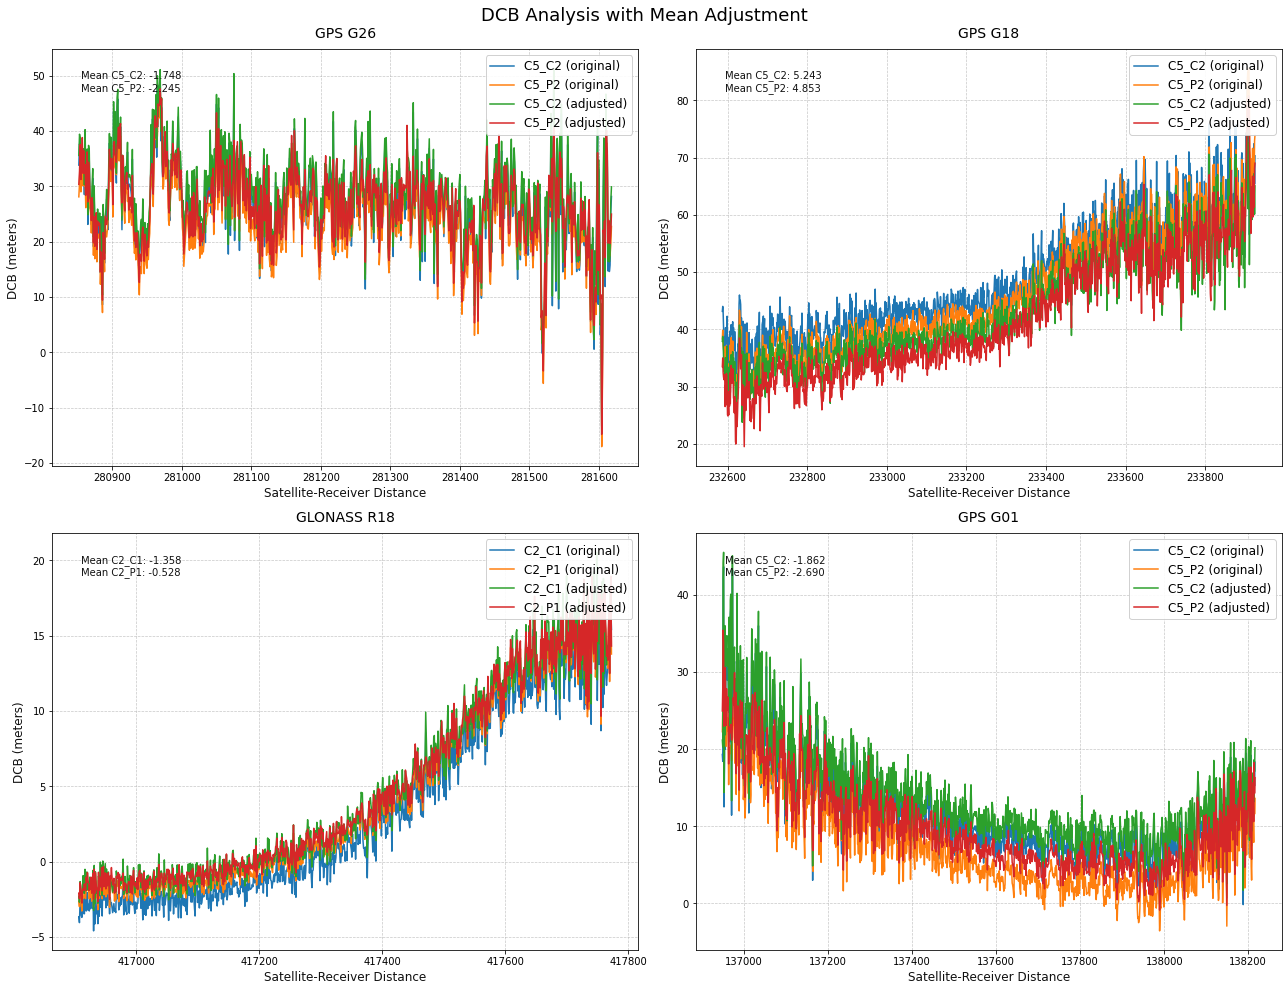

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

def calculate_adjusted_values(valid_data, constel):
    if constel == 'GLONASS':
        combo_C2_C1 = (valid_data['C2_C1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C2_P1 = (valid_data['C2_P1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C2_C1 = np.nanmean(combo_C2_C1)
        mean_C2_P1 = np.nanmean(combo_C2_P1)
        
        adjusted_C2_C1 = (valid_data['C2_C1'] - mean_C2_C1).replace([np.inf, -np.inf], np.nan).dropna()
        adjusted_C2_P1 = (valid_data['C2_P1'] - mean_C2_P1).replace([np.inf, -np.inf], np.nan).dropna()
        
        return adjusted_C2_C1, adjusted_C2_P1, valid_data['C2_C1'], valid_data['C2_P1'], mean_C2_C1, mean_C2_P1

    else:
        combo_C5_C2 = (valid_data['C5_C1'] - valid_data['C2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C5_P2 = (valid_data['C5_C1'] - valid_data['P2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C5_C2 = np.nanmean(combo_C5_C2)
        mean_C5_P2 = np.nanmean(combo_C5_P2)
        
        adjusted_C5_C2 = (valid_data['C5_C2'] - mean_C5_C2).replace([np.inf, -np.inf], np.nan).dropna()
        adjusted_C5_P2 = (valid_data['C5_P2'] - mean_C5_P2).replace([np.inf, -np.inf], np.nan).dropna()
        
        return adjusted_C5_C2, adjusted_C5_P2, valid_data['C5_C2'], valid_data['C5_P2'], mean_C5_C2, mean_C5_P2

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        adjusted_values = calculate_adjusted_values(valid_data, constel)
        
        if constel == 'GLONASS':
            adjusted_C2_C1, adjusted_C2_P1, original_C2_C1, original_C2_P1, mean_C2_C1, mean_C2_P1 = adjusted_values
            ax.plot(original_C2_C1, label='C2_C1 (original)')
            ax.plot(original_C2_P1, label='C2_P1 (original)')
            ax.plot(adjusted_C2_C1, label='C2_C1 (adjusted)')
            ax.plot(adjusted_C2_P1, label='C2_P1 (adjusted)')
            ax.text(0.05, 0.95, f'Mean C2_C1: {mean_C2_C1:.3f}\nMean C2_P1: {mean_C2_P1:.3f}', 
                    color=TEXT_COLOR, ha='left', va='top', fontsize=10, transform=ax.transAxes)
        else:
            adjusted_C5_C2, adjusted_C5_P2, original_C5_C2, original_C5_P2, mean_C5_C2, mean_C5_P2 = adjusted_values
            ax.plot(original_C5_C2, label='C5_C2 (original)')
            ax.plot(original_C5_P2, label='C5_P2 (original)')
            ax.plot(adjusted_C5_C2, label='C5_C2 (adjusted)')
            ax.plot(adjusted_C5_P2, label='C5_P2 (adjusted)')
            ax.text(0.05, 0.95, f'Mean C5_C2: {mean_C5_C2:.3f}\nMean C5_P2: {mean_C5_P2:.3f}', 
                    color=TEXT_COLOR, ha='left', va='top', fontsize=10, transform=ax.transAxes)
        
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    ax.set_title(f'{constel} {sv_value}', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()

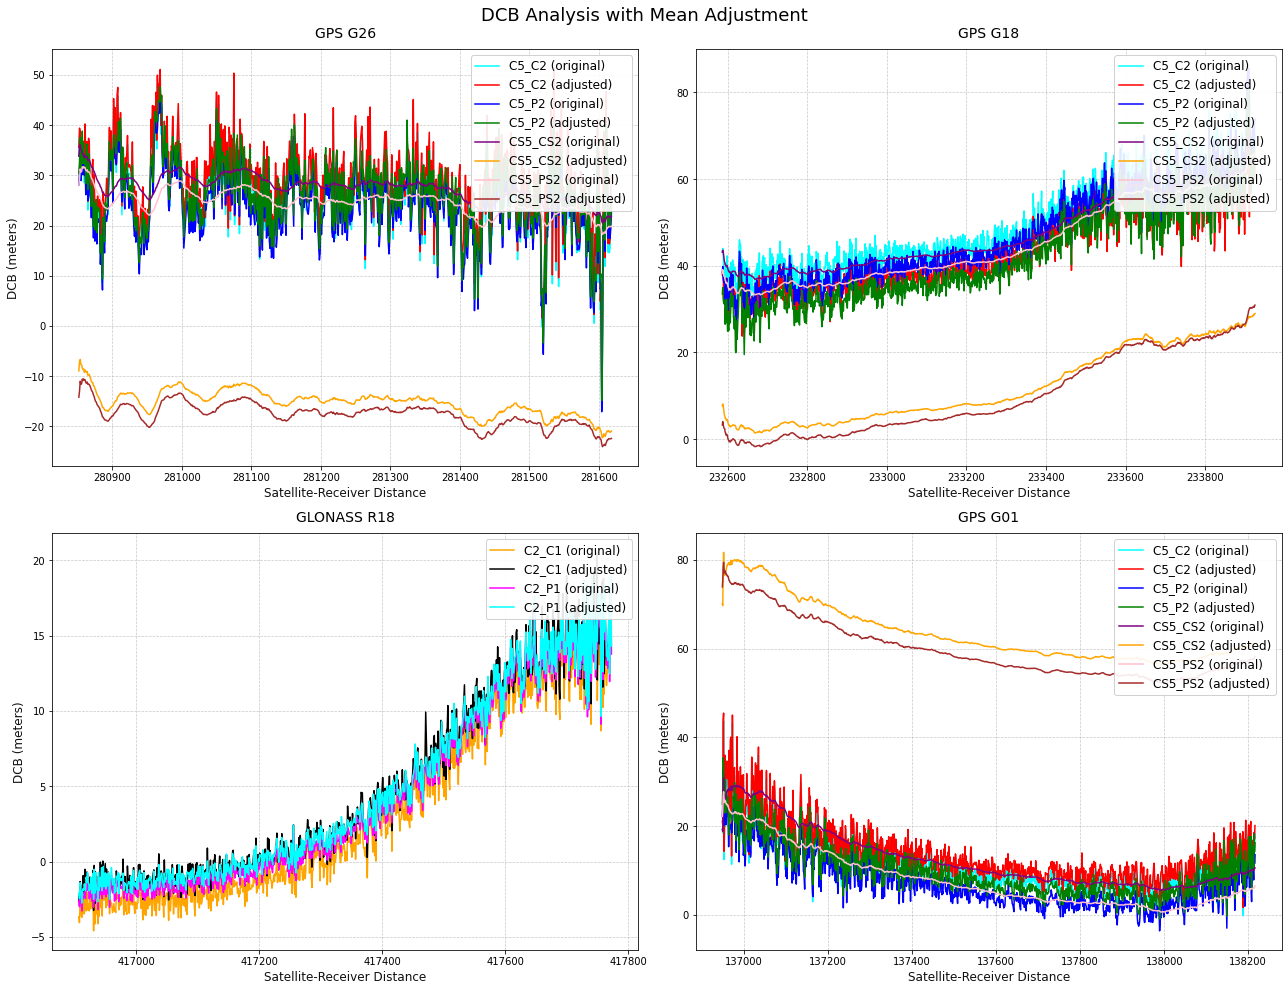

In [86]:
# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

# Configurações por satélite (G=GPS, R=GLONASS)
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

# Configurações de plotagem
plot_config = {
    'GPS': {
        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
        'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5},
        'original_CS5_CS2': {'color': 'purple', 'label': 'CS5_CS2 (original)', 'linewidth': 1.5},
        'adjusted_CS5_CS2': {'color': 'orange', 'label': 'CS5_CS2 (adjusted)', 'linewidth': 1.5},
        'original_CS5_PS2': {'color': 'pink', 'label': 'CS5_PS2 (original)', 'linewidth': 1.5},
        'adjusted_CS5_PS2': {'color': 'brown', 'label': 'CS5_PS2 (adjusted)', 'linewidth': 1.5}
    },
    'GLONASS': {
        'original_C2_C1': {'color': 'orange', 'label': 'C2_C1 (original)', 'linewidth': 1.5},
        'adjusted_C2_C1': {'color': 'black', 'label': 'C2_C1 (adjusted)', 'linewidth': 1.5},
        'original_C2_P1': {'color': 'magenta', 'label': 'C2_P1 (original)', 'linewidth': 1.5},
        'adjusted_C2_P1': {'color': 'cyan', 'label': 'C2_P1 (adjusted)', 'linewidth': 1.5},
        'original_P2_P1': {'color': 'brown', 'label': 'P2_P1 (original)', 'linewidth': 1.5},
        'adjusted_P2_P1': {'color': 'yellow', 'label': 'P2_P1 (adjusted)', 'linewidth': 1.5},
        'original_CS2_CS1': {'color': 'lime', 'label': 'CS2_CS1 (original)', 'linewidth': 1.5},
        'adjusted_CS2_CS1': {'color': 'navy', 'label': 'CS2_CS1 (adjusted)', 'linewidth': 1.5},
        'original_CS2_PS1': {'color': 'gold', 'label': 'CS2_PS1 (original)', 'linewidth': 1.5},
        'adjusted_CS2_PS1': {'color': 'teal', 'label': 'CS2_PS1 (adjusted)', 'linewidth': 1.5},
        'original_PS2_PS1': {'color': 'violet', 'label': 'PS2_PS1 (original)', 'linewidth': 1.5},
        'adjusted_PS2_PS1': {'color': 'gray', 'label': 'PS2_PS1 (adjusted)', 'linewidth': 1.5}
    }
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        if constel == 'GLONASS':
            # Aplicando o mesmo método de GPS para GLONASS
            combo_C2_C1 = (valid_data['C2_C1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
            combo_C2_P1 = (valid_data['C2_P1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()

            #combo_CS2_CS1 = (valid_data['CS2_CS1'] - valid_data['PS2_PS1']).replace([np.inf, -np.inf], np.nan).dropna()
            #combo_CS2_PS1 = (valid_data['CS2_PS1'] - valid_data['PS2_PS1']).replace([np.inf, -np.inf], np.nan).dropna()
            
            mean_C2_C1 = np.nanmean(combo_C2_C1)
            mean_C2_P1 = np.nanmean(combo_C2_P1)

            #mean_CS2_CS1 = np.nanmean(combo_CS2_CS1)
            #mean_CS2_PS1 = np.nanmean(combo_CS2_PS1)
            
            adjusted_C2_C1 = (valid_data['C2_C1'] - mean_C2_C1).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C2_P1 = (valid_data['C2_P1'] - mean_C2_P1).replace([np.inf, -np.inf], np.nan).dropna()

            #adjusted_CS2_CS1 = (valid_data['CS2_CS1'] - mean_CS2_CS1).replace([np.inf, -np.inf], np.nan).dropna()
            #adjusted_CS2_PS1 = (valid_data['CS2_PS1'] - mean_CS2_PS1).replace([np.inf, -np.inf], np.nan).dropna()
            
            ax.plot(valid_data['C2_C1'], **plot_config['GLONASS']['original_C2_C1'])
            ax.plot(adjusted_C2_C1, **plot_config['GLONASS']['adjusted_C2_C1'])
            ax.plot(valid_data['C2_P1'], **plot_config['GLONASS']['original_C2_P1'])
            ax.plot(adjusted_C2_P1, **plot_config['GLONASS']['adjusted_C2_P1'])

            #ax.plot(valid_data['CS2_CS1'], **plot_config['GLONASS']['original_CS2_CS1'])
            #ax.plot(adjusted_CS2_CS1, **plot_config['GLONASS']['adjusted_CS2_CS1'])
            #ax.plot(valid_data['CS2_PS1'], **plot_config['GLONASS']['original_CS2_PS1'])
            #ax.plot(adjusted_CS2_PS1, **plot_config['GLONASS']['adjusted_CS2_PS1'])
            
        else:
            combo_C5_C2 = (valid_data['C5_C1'] - valid_data['C2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
            combo_C5_P2 = (valid_data['C5_C1'] - valid_data['P2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
            
            combo_CS5_CS2 = (valid_data['CS5_CS1'] - valid_data['CS2_CS1']).replace([np.inf, -np.inf], np.nan).dropna()
            combo_CS5_PS2 = (valid_data['CS5_CS1'] - valid_data['PS2_CS1']).replace([np.inf, -np.inf], np.nan).dropna()
            
            mean_C5_C2 = np.nanmean(combo_C5_C2)
            mean_C5_P2 = np.nanmean(combo_C5_P2)

            mean_CS5_CS2 = np.nanmean(combo_CS5_CS2)
            mean_CS5_PS2 = np.nanmean(combo_CS5_PS2)
            
            adjusted_C5_C2 = (valid_data['C5_C2'] - mean_C5_C2).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_C5_P2 = (valid_data['C5_P2'] - mean_C5_P2).replace([np.inf, -np.inf], np.nan).dropna()

            adjusted_CS5_CS2 = (valid_data['CS5_CS2'] - mean_CS5_CS2).replace([np.inf, -np.inf], np.nan).dropna()
            adjusted_CS5_PS2 = (valid_data['CS5_PS2'] - mean_CS5_PS2).replace([np.inf, -np.inf], np.nan).dropna()
            
            ax.plot(valid_data['C5_C2'], **plot_config['GPS']['original_C5_C2'])
            ax.plot(adjusted_C5_C2, **plot_config['GPS']['adjusted_C5_C2'])
            ax.plot(valid_data['C5_P2'], **plot_config['GPS']['original_C5_P2'])
            ax.plot(adjusted_C5_P2, **plot_config['GPS']['adjusted_C5_P2'])

            ax.plot(valid_data['CS5_CS2'], **plot_config['GPS']['original_CS5_CS2'])
            ax.plot(adjusted_CS5_CS2, **plot_config['GPS']['adjusted_CS5_CS2'])
            ax.plot(valid_data['CS5_PS2'], **plot_config['GPS']['original_CS5_PS2'])
            ax.plot(adjusted_CS5_PS2, **plot_config['GPS']['adjusted_CS5_PS2'])
        
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    ax.set_title(f'{constel} {sv_value}', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, hspace=0.3, wspace=0.25)

plt.tight_layout()
plt.show()


In [87]:
print(mean_C5_C2)
print(mean_C5_P2)
print(np.nanmean(combo_CS5_CS2))
print(mean_CS5_PS2)

-1.862451667608746
-2.6903263420284462
-50.82873784547599
-51.65581779435149


In [88]:
'''
# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

#Configurações por satélite (G=GPS, R=GLONASS)
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

#Configurações de plotagem (incluindo versões suavizadas)
plot_config = {
    'GPS': {
        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
        'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5},
        'original_CS5_CS2': {'color': 'purple', 'label': 'CS5_CS2 (original)', 'linewidth': 1.5},
        'adjusted_CS5_CS2': {'color': 'orange', 'label': 'CS5_CS2 (adjusted)', 'linewidth': 1.5},
        'original_CS5_PS2': {'color': 'pink', 'label': 'CS5_PS2 (original)', 'linewidth': 1.5},
        'adjusted_CS5_PS2': {'color': 'brown', 'label': 'CS5_PS2 (adjusted)', 'linewidth': 1.5}
    },
    'GLONASS': {
        'original_C2_C1': {'color': 'orange', 'label': 'C2_C1 (original)', 'linewidth': 1.5},
        'adjusted_C2_C1': {'color': 'black', 'label': 'C2_C1 (adjusted)', 'linewidth': 1.5},
        'original_C2_P1': {'color': 'magenta', 'label': 'C2_P1 (original)', 'linewidth': 1.5},
        'adjusted_C2_P1': {'color': 'cyan', 'label': 'C2_P1 (adjusted)', 'linewidth': 1.5},
        'original_P2_P1': {'color': 'brown', 'label': 'P2_P1 (original)', 'linewidth': 1.5},
        'adjusted_P2_P1': {'color': 'yellow', 'label': 'P2_P1 (adjusted)', 'linewidth': 1.5},
        #'original_CS2_CS1': {'color': 'lime', 'label': 'CS2_CS1 (original)', 'linewidth': 1.5},
        #'adjusted_CS2_CS1': {'color': 'navy', 'label': 'CS2_CS1 (adjusted)', 'linewidth': 1.5},
        #'original_CS2_PS1': {'color': 'gold', 'label': 'CS2_PS1 (original)', 'linewidth': 1.5},
        #'adjusted_CS2_PS1': {'color': 'teal', 'label': 'CS2_PS1 (adjusted)', 'linewidth': 1.5},
        #'original_PS2_PS1': {'color': 'violet', 'label': 'PS2_PS1 (original)', 'linewidth': 1.5},
        #'adjusted_PS2_PS1': {'color': 'gray', 'label': 'PS2_PS1 (adjusted)', 'linewidth': 1.5}
    }
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    ax.set_title(f'{constel} {sv_value}', fontsize=14, color=TITLE_COLOR, pad=12)
    
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        if constel == 'GLONASS':
            adjusted_values = {}
            for key in ['C2_C1', 'C2_P1', 'P2_P1']: #'CS2_CS1', 'CS2_PS1', 'PS2_PS1'
                mean_value = np.nanmean(valid_data[key])
                adjusted_values[key] = valid_data[key] - mean_value
                ax.plot(valid_data[key], **plot_config['GLONASS'][f'original_{key}'])
                ax.plot(adjusted_values[key], **plot_config['GLONASS'][f'adjusted_{key}'])
        else:
            adjusted_values = {}
            for key in ['C5_C2', 'C5_P2', 'CS5_CS2', 'CS5_PS2']:
                mean_value = np.nanmean(valid_data[key])
                adjusted_values[key] = valid_data[key] - mean_value
                ax.plot(valid_data[key], **plot_config['GPS'][f'original_{key}'])
                ax.plot(adjusted_values[key], **plot_config['GPS'][f'adjusted_{key}'])
    
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9)
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    
plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, 
                    hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()
'''

"\n# Configuração de cores\nTEXT_COLOR = '#111111'\nTITLE_COLOR = '#000000'\n\n# Criar figura com 4 subplots\nfig, axs = plt.subplots(2, 2, figsize=(18, 14))\nfig.suptitle('DCB Analysis with Mean Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)\n\n#Configurações por satélite (G=GPS, R=GLONASS)\ndatasets = [\n    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),\n    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),\n    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),\n    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))\n]\n\n#Configurações de plotagem (incluindo versões suavizadas)\nplot_config = {\n    'GPS': {\n        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},\n        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},\n        'original_C5_P2': {'color': 'blue', 'label': 'C

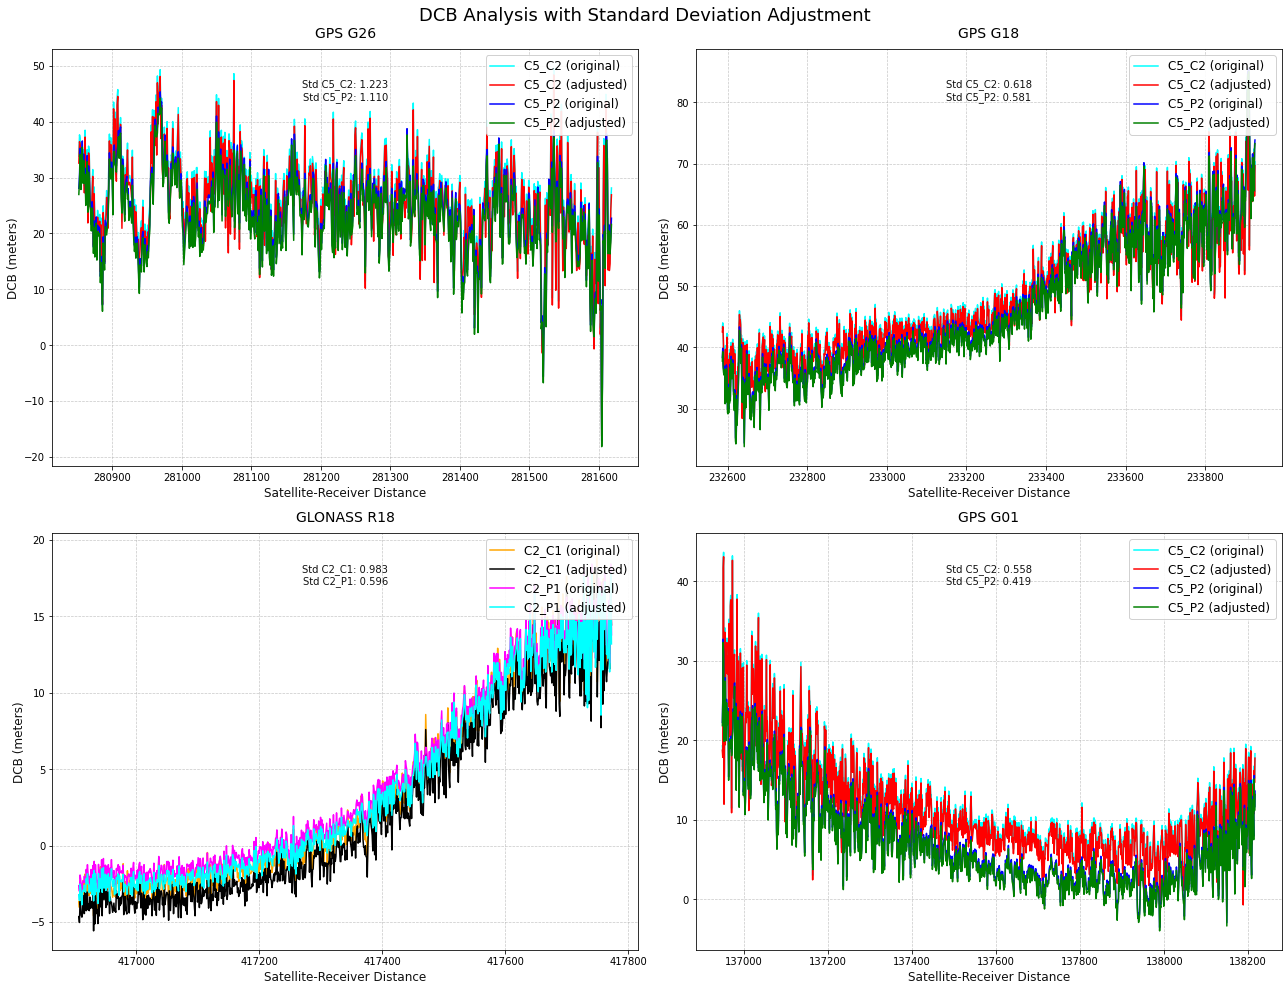

In [89]:
# Configuração de cores
TEXT_COLOR = '#111111'
TITLE_COLOR = '#000000'

# Função para realizar o cálculo dos valores ajustados usando média ou desvio padrão
def calculate_adjusted_values(valid_data, constel):
    if constel == 'GLONASS':
        # GLONASS
        combo_C2_C1 = (valid_data['C2_C1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C2_P1 = (valid_data['C2_P1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C2_C1 = np.nanmean(combo_C2_C1)
        mean_C2_P1 = np.nanmean(combo_C2_P1)
        
        std_C2_C1 = np.nanstd(combo_C2_C1)
        std_C2_P1 = np.nanstd(combo_C2_P1)
        
        adjusted_C2_C1 = (valid_data['C2_C1'] - std_C2_C1).replace([np.inf, -np.inf], np.nan).dropna()
        adjusted_C2_P1 = (valid_data['C2_P1'] - std_C2_P1).replace([np.inf, -np.inf], np.nan).dropna()
        
        return adjusted_C2_C1, adjusted_C2_P1, valid_data['C2_C1'], valid_data['C2_P1'], mean_C2_C1, mean_C2_P1, std_C2_C1, std_C2_P1

    else:
        # GPS
        combo_C5_C2 = (valid_data['C5_C1'] - valid_data['C2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C5_P2 = (valid_data['C5_C1'] - valid_data['P2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C5_C2 = np.nanmean(combo_C5_C2)
        mean_C5_P2 = np.nanmean(combo_C5_P2)
        
        std_C5_C2 = np.nanstd(combo_C5_C2)
        std_C5_P2 = np.nanstd(combo_C5_P2)
        
        adjusted_C5_C2 = (valid_data['C5_C2'] - std_C5_C2).replace([np.inf, -np.inf], np.nan).dropna()
        adjusted_C5_P2 = (valid_data['C5_P2'] - std_C5_P2).replace([np.inf, -np.inf], np.nan).dropna()
        
        return adjusted_C5_C2, adjusted_C5_P2, valid_data['C5_C2'], valid_data['C5_P2'], mean_C5_C2, mean_C5_P2, std_C5_C2, std_C5_P2

# Criar figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DCB Analysis with Standard Deviation Adjustment', fontsize=18, y=0.98, color=TITLE_COLOR)

# Configurações por satélite (G=GPS, R=GLONASS)
datasets = [
    ('G26', axs[0, 0], lambda df: (df['sv'].str.startswith('G26')) & (df['arc'] > 1)),
    ('G18', axs[0, 1], lambda df: (df['sv'].str.startswith('G18')) & (df['arc'] > 0)),
    ('R18', axs[1, 0], lambda df: (df['sv'].str.startswith('R18')) & (df['arc'] > 0)),
    ('G01', axs[1, 1], lambda df: (df['sv'].str.startswith('G01')) & (df['arc'] > 0))
]

# Configurações de plotagem
plot_config = {
    'GPS': {
        'original_C5_C2': {'color': 'cyan', 'label': 'C5_C2 (original)', 'linewidth': 1.5},
        'adjusted_C5_C2': {'color': 'red', 'label': 'C5_C2 (adjusted)', 'linewidth': 1.5},
        'original_C5_P2': {'color': 'blue', 'label': 'C5_P2 (original)', 'linewidth': 1.5},
        'adjusted_C5_P2': {'color': 'green', 'label': 'C5_P2 (adjusted)', 'linewidth': 1.5}
    },
    'GLONASS': {
        'original_C2_C1': {'color': 'orange', 'label': 'C2_C1 (original)', 'linewidth': 1.5},
        'adjusted_C2_C1': {'color': 'black', 'label': 'C2_C1 (adjusted)', 'linewidth': 1.5},
        'original_C2_P1': {'color': 'magenta', 'label': 'C2_P1 (original)', 'linewidth': 1.5},
        'adjusted_C2_P1': {'color': 'cyan', 'label': 'C2_P1 (adjusted)', 'linewidth': 1.5},
        'original_P2_P1': {'color': 'brown', 'label': 'P2_P1 (original)', 'linewidth': 1.5},
        'adjusted_P2_P1': {'color': 'yellow', 'label': 'P2_P1 (adjusted)', 'linewidth': 1.5}
    }
}

for sv_value, ax, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    
    if not any(mask):
        ax.text(0.5, 0.5, f'No data for {sv_value}', color=TEXT_COLOR,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{sv_value}-{constel[0]}', fontsize=14, color=TITLE_COLOR)
        continue
    
    valid_data = df_final[mask].copy()
    
    try:
        adjusted_values = calculate_adjusted_values(valid_data, constel)
        
        if constel == 'GLONASS':
            adjusted_C2_C1, adjusted_C2_P1, original_C2_C1, original_C2_P1, mean_C2_C1, mean_C2_P1, std_C2_C1, std_C2_P1 = adjusted_values
            ax.plot(original_C2_C1, **plot_config['GLONASS']['original_C2_C1'])
            ax.plot(adjusted_C2_C1, **plot_config['GLONASS']['adjusted_C2_C1'])
            ax.plot(original_C2_P1, **plot_config['GLONASS']['original_C2_P1'])
            ax.plot(adjusted_C2_P1, **plot_config['GLONASS']['adjusted_C2_P1'])
            
            # Adicionar texto com média e desvio padrão
            ax.text(0.5, 0.9, f'Std C2_C1: {std_C2_C1:.3f}\nStd C2_P1: {std_C2_P1:.3f}', color=TEXT_COLOR,
                    ha='center', va='center', fontsize=10, transform=ax.transAxes)
        
        else:
            adjusted_C5_C2, adjusted_C5_P2, original_C5_C2, original_C5_P2, mean_C5_C2, mean_C5_P2, std_C5_C2, std_C5_P2 = adjusted_values
            ax.plot(original_C5_C2, **plot_config['GPS']['original_C5_C2'])
            ax.plot(adjusted_C5_C2, **plot_config['GPS']['adjusted_C5_C2'])
            ax.plot(original_C5_P2, **plot_config['GPS']['original_C5_P2'])
            ax.plot(adjusted_C5_P2, **plot_config['GPS']['adjusted_C5_P2'])
            
            # Adicionar texto com média e desvio padrão
            ax.text(0.5, 0.9, f'Std C5_C2: {std_C5_C2:.3f}\nStd C5_P2: {std_C5_P2:.3f}', color=TEXT_COLOR,
                    ha='center', va='center', fontsize=10, transform=ax.transAxes)
        
    except KeyError as e:
        ax.text(0.5, 0.5, f'Missing columns for {sv_value}: {str(e)}', color='red',
                ha='center', va='center', fontsize=10)
        continue
    
    ax.set_title(f'{constel} {sv_value}', fontsize=14, color=TITLE_COLOR, pad=12)
    ax.set_xlabel('Satellite-Receiver Distance', fontsize=12, color=TEXT_COLOR)
    ax.set_ylabel('DCB (meters)', fontsize=12, color=TEXT_COLOR)
    
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
    
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.subplots_adjust(top=0.93, bottom=0.08, left=0.08, right=0.96, hspace=0.3, wspace=0.25)
plt.tight_layout()
plt.show()


In [90]:
import numpy as np
import pandas as pd

# Lista para armazenar os resultados
results = []

def calculate_metrics(valid_data, constel, sv_value):
    if constel == 'GLONASS':
        combo_C2_C1 = (valid_data['C2_C1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C2_P1 = (valid_data['C2_P1'] - valid_data['P2_P1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C2_C1, std_C2_C1 = np.nanmean(combo_C2_C1), np.nanstd(combo_C2_C1)
        mean_C2_P1, std_C2_P1 = np.nanmean(combo_C2_P1), np.nanstd(combo_C2_P1)
        
        results.append([sv_value, 'C2_C1', mean_C2_C1, std_C2_C1])
        results.append([sv_value, 'C2_P1', mean_C2_P1, std_C2_P1])
    
    else:
        combo_C5_C2 = (valid_data['C5_C1'] - valid_data['C2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        combo_C5_P2 = (valid_data['C5_C1'] - valid_data['P2_C1']).replace([np.inf, -np.inf], np.nan).dropna()
        
        mean_C5_C2, std_C5_C2 = np.nanmean(combo_C5_C2), np.nanstd(combo_C5_C2)
        mean_C5_P2, std_C5_P2 = np.nanmean(combo_C5_P2), np.nanstd(combo_C5_P2)
        
        results.append([sv_value, 'C5_C2', mean_C5_C2, std_C5_C2])
        results.append([sv_value, 'C5_P2', mean_C5_P2, std_C5_P2])

# Loop pelos satélites para calcular os valores
for sv_value, _, mask_func in datasets:
    mask = mask_func(df_final)
    constel = 'GLONASS' if sv_value.startswith('R') else 'GPS'
    if any(mask):
        valid_data = df_final[mask].copy()
        calculate_metrics(valid_data, constel, sv_value)

# Criando o DataFrame para exibição
df_results = pd.DataFrame(results, columns=['Satélite', 'Métrica', 'Média', 'Desvio Padrão'])
print(df_results.to_string(index=False))


Satélite Métrica     Média  Desvio Padrão
     G26   C5_C2 -1.748183       1.223334
     G26   C5_P2 -2.245167       1.109590
     G18   C5_C2  5.243387       0.617592
     G18   C5_P2  4.853401       0.580633
     R18   C2_C1 -1.357567       0.982700
     R18   C2_P1 -0.528258       0.596013
     G01   C5_C2 -1.862452       0.557517
     G01   C5_P2 -2.690326       0.418648
